In [2]:
import torch
import pandas as pd
import numpy as np
#import random
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold,StratifiedKFold 
import gc
import os
from os import path
from sys import path as systemPath
systemPath.append(path.join('..', '..'))
from scipy.spatial import distance_matrix
#import argparse
import random
import matplotlib.pyplot as plt
import networkx as nx
import MDAnalysis as mda
from matplotlib.ticker import MaxNLocator,MultipleLocator
from MDAnalysis.core.groups import AtomGroup
import seaborn as sns
import statistics as st
from scipy.stats import gaussian_kde

## dataset

In [3]:
# real position index
mutation_pos = [29, 29, 35, 35, 35, 41, 41, 50, 59, 62, 77, 86, 89, 92, 92, 95, 101, 101, 104, 107, 107, 110, 113, 113, 119, 119, 122, 122, 137, 137, 143, 143, 149, 149, 152, 161, 164, 164, 170, 170, 176, 176, 188, 191, 191, 194, 203, 203, 206, 209, 215, 218, 218, 221, 221, 227, 227, 227, 230, 233, 236, 236, 236, 239, 239, 242, 242, 245, 245, 248, 251, 260, 260, 263, 266, 269, 272, 293, 299, 302, 302, 314, 320, 329, 341, 365, 365, 368, 368, 371, 371, 392, 398, 398, 398, 404, 407, 425, 425, 431, 431, 431, 455, 464, 464, 467, 473, 476, 488, 494, 497, 524, 527, 539, 539, 542, 542, 557, 557, 566, 575, 575, 581, 581, 593, 596, 602, 605, 608, 611, 614, 617, 626, 626, 647, 653, 653, 659, 659, 662, 671, 674, 677, 680, 680, 683, 689, 692, 695, 698, 704, 704, 707, 713, 716, 725, 734, 755, 764, 782, 785, 788, 800, 812, 818, 839, 848, 860, 860, 860, 863, 866, 878, 884, 884, 887, 890, 896, 899, 899, 902, 914, 914, 917, 920, 923, 926, 929, 938, 944, 962, 980, 983, 983, 989, 989, 992, 1004, 1007, 1007, 1010, 1013, 1013, 1016, 1019, 1022, 1025, 116, 1028, 125, 131, 158, 164, 32, 32, 32, 179, 182, 191, 200, 35, 206, 206, 212, 218, 227, 38, 242, 41, 275, 275, 293, 308, 308, 329, 347, 50, 365, 374, 53, 386, 407, 410, 56, 416, 419, 431, 440, 443, 59, 59, 59, 452, 470, 473, 485, 506, 521, 524, 551, 560, 569, 572, 578, 581, 587, 596, 599, 602, 608, 662, 662, 665, 671, 671, 677, 686, 689, 692, 692, 701, 704, 86, 716, 719, 722, 734, 770, 812, 812, 815, 854, 101, 878, 893, 917, 932, 947, 971, 113, 995, 1091, 1097, 1103, 1106, 1139, 1163, 1166, 1166, 1175, 1175, 1184, 1190, 1220, 1226, 1229, 1229, 1238, 1247, 1247, 1253, 1259, 1259, 1262, 1262, 1268, 1271, 1280, 1283, 1289, 1295, 1298, 1301, 1301, 1301, 1304, 1304, 1307, 1310, 1310, 1310, 1310, 1313, 1313, 1319, 1319, 1322, 1322, 1331, 1331, 1337, 1340, 1343, 1343, 1349, 1349, 1358, 1361, 1364, 1364, 1379, 1382, 1391, 1391, 1397, 1400, 1406, 1418, 1421, 1427, 1433, 1442, 1451, 1451, 1457, 1457, 1463, 1466, 1472, 1481, 1484, 1484, 1484, 1490, 1493, 1499, 1499, 1502, 1505, 1514, 1517, 1517, 1520, 1526, 1535, 1559, 1565, 1568, 1568, 1571, 1574, 1574, 1589, 1601, 1607, 1610, 1613, 1619, 1634, 1634, 1637, 1643, 1649, 1649, 1649, 1655, 1673, 1673, 1685, 1685, 1688, 1691, 1694, 1703, 1709, 1712, 1718, 1724, 1730, 1736, 1739, 1739, 1742, 1745, 1751, 1757, 1757, 1760, 1763, 1766, 1769, 1769, 1778, 1802, 1808, 1820, 1826, 1832, 1850, 1853, 1865, 1868, 1874, 1877, 1889, 1910, 1919, 1922, 1928, 1928, 1943, 1946, 1946, 1955, 1961, 1970, 1979, 1985, 1988, 2000, 2000, 2009, 2012, 2015, 2024, 2030, 2039, 2051, 2054, 2057, 2063, 2069, 2072, 2075, 2075, 2075, 2075, 1163, 2063, 2063, 2066, 1166, 1169, 1172, 1172, 1172, 1184, 1190, 1220, 1232, 1238, 1241, 1241, 1244, 1250, 1256, 1262, 1262, 1277, 1277, 1085, 1286, 1289, 1292, 1310, 1088, 1313, 1325, 1328, 1358, 1370, 1094, 1373, 1415, 1424, 1427, 1100, 1454, 1490, 1523, 1535, 1538, 1541, 1544, 1112, 1598, 1607, 1619, 1634, 1634, 1646, 1673, 1682, 1688, 1706, 1712, 1718, 1721, 1727, 1733, 1736, 1742, 1745, 1760, 1763, 1769, 1775, 1775, 1778, 1784, 1787, 1790, 1793, 1796, 1814, 1820, 1826, 1829, 1847, 1142, 1853, 1907, 1916, 1916, 1928, 1934, 1955, 1955, 1958, 1958, 1964, 1967, 1976, 1997, 2003, 2018, 2057]
# mutation type
mutation_name = ["ALA" , "ASP", "CYS", "SER", "ASP", "ARG", "VAL", "ARG", "CYS", "CYS", "ASP", "ARG", "CYS", "ARG", "GLU", "ARG", "ARG", "VAL", "GLU", "SER", "VAL", "CYS", "ARG", "ASP", "SER", "ASP", "SER", "ALA", "ARG", "ASP", "SER", "ARG", "ARG", "ASP", "ARG", "GLU", "ARG", "ASP", "ARG", "ALA", "CYS", "SER", "ARG", "CYS", "SER", "CYS", "VAL", "ALA", "SER", "SER", "ALA", "CYS", "VAL", "CYS", "SER", "ARG", "CYS", "SER", "GLU", "SER", "CYS", "ALA", "ASP", "CYS", "ASP", "CYS", "SER", "SER", "CYS", "SER", "ALA", "CYS", "ALA", "SER", "CYS", "VAL", "VAL", "CYS", "SER", "ARG", "GLU", "ARG", "ALA", "CYS", "CYS", "CYS", "ALA", "CYS", "SER", "CYS", "ASP", "ALA", "ARG", "SER", "CYS", "ARG", "ARG", "SER", "ALA", "CYS", "SER", "ASP", "ARG", "CYS", "SER", "SER", "ARG", "VAL", "ARG", "SER", "ALA", "VAL", "SER", "CYS", "SER", "CYS", "SER", "SER", "ASP", "ARG", "CYS", "ASP", "SER", "VAL", "SER", "CYS", "VAL", "SER", "CYS", "SER", "SER", "SER", "CYS", "SER", "SER", "VAL", "ALA", "SER", "ARG", "CYS", "ALA", "ALA", "SER", "ARG", "ASP", "ARG", "ASP", "SER", "CYS", "ALA", "CYS", "SER", "CYS", "SER", "SER", "SER", "CYS", "GLU", "CYS", "CYS", "CYS", "ARG", "ASP", "ARG", "VAL", "CYS", "SER", "SER", "ALA", "VAL", "ARG", "SER", "SER", "SER", "CYS", "SER", "SER", "SER", "SER", "ASP", "ALA", "SER", "CYS", "SER", "CYS", "SER", "ALA", "SER", "ASP", "ALA", "CYS", "SER", "CYS", "ASP", "SER", "VAL", "ARG", "CYS", "SER", "CYS", "ASP", "CYS", "SER", "VAL", "SER", "VAL", "VAL", "GLU", "ASP", "SER", "VAL", "VAL", "SER", "ARG", "SER", "ALA", "CYS", "ASP", "ASP", "SER", "ARG", "VAL", "ASP", "ALA", "SER", "ALA", "VAL", "ALA", "SER", "CYS", "ASP", "ASP", "VAL", "ALA", "SER", "VAL", "GLU", "ASP", "ARG", "ARG", "ALA", "ASP", "ARG", "ASP", "SER", "ARG", "VAL", "ARG", "ASP", "ARG", "ASP", "SER", "ARG", "SER", "SER", "SER", "SER", "SER", "ALA", "SER", "SER", "VAL", "VAL", "ARG", "ASP", "SER", "SER", "ASP", "SER", "SER", "ARG", "ALA", "ASP", "ASP", "VAL", "ASP", "ARG", "VAL", "ARG", "VAL", "VAL", "ALA", "GLU", "ASP", "VAL", "SER", "ASP", "ASP", "ASP", "ALA", "ASP", "ARG", "GLU", "ARG", "ASP", "ARG", "SER", "SER", "ALA", "SER", "ASP", "ASP", "ASP", "ASP", "SER", "VAL", "VAL", "SER", "ASP", "ARG", "ASP", "ASP", "VAL", "ASP", "ASP", "ASP", "VAL", "ASP", "ASP", "VAL", "SER", "ALA", "VAL", "ALA", "VAL", "VAL", "ARG", "ASP", "ARG", "ARG", "SER", "GLU", "SER", "CYS", "ASP", "ASP", "VAL", "SER", "CYS", "SER", "ARG", "PRO", "ARG", "SER", "CYS", "SER", "SER", "CYS", "CYS", "SER", "SER", "TRP", "SER", "ALA", "ASP", "VAL", "GLU", "VAL", "CYS", "SER", "SER", "VAL", "SER", "ASP", "SER", "SER", "GLU", "ARG", "GLU", "CYS", "SER", "ALA", "ASP", "VAL", "VAL", "GLU", "GLU", "GLU", "VAL", "ASP", "SER", "ASP", "VAL", "ARG", "SER", "ARG", "GLU", "CYS", "GLU", "CYS", "SER", "VAL", "ARG", "ASP", "CYS", "ARG", "SER", "CYS", "SER", "VAL", "SER", "ASP", "SER", "ARG", "VAL", "ASP", "GLU", "VAL", "SER", "VAL", "ASP", "ASP", "ARG", "VAL", "ASP", "ASP", "CYS", "ASP", "SER", "ASP", "ASP", "SER", "SER", "CYS", "CYS", "ARG", "GLU", "SER", "VAL", "VAL", "SER", "VAL", "VAL", "SER", "SER", "ARG", "SER", "CYS", "ASP", "ARG", "SER", "ALA", "CYS", "SER", "SER", "ARG", "VAL", "SER", "CYS", "SER", "ASP", "ASP", "SER", "ARG", "ARG", "CYS", "ARG", "SER", "SER", "CYS", "ASP", "VAL", "ASP", "VAL", "VAL", "ASP", "SER", "SER", "ARG", "ARG", "GLU", "ARG", "ASP", "SER", "SER", "CYS", "ASP", "ASP", "VAL", "VAL", "CYS", "ALA", "ARG", "ARG", "SER", "ASP", "VAL", "GLU", "ASP", "VAL", "ASP", "ARG", "ASP", "ASP", "VAL", "CYS", "VAL", "GLU", "ARG", "SER", "ARG", "ARG", "GLU", "ARG", "ARG", "ARG", "ASP", "SER", "CYS", "SER", "VAL", "CYS", "SER", "ARG", "ASP", "ARG", "ASP", "ASP", "GLU", "ARG", "GLU", "ASP", "ARG", "ARG", "SER", "ALA", "ASP", "SER", "ASP", "SER", "VAL", "SER", "ASP", "ARG", "VAL", "ASP", "ASP", "CYS", "ASP", "CYS", "ASP", "ARG", "VAL", "SER", "CYS", "GLU", "ARG", "VAL", "CYS", "GLU", "ASP", "CYS", "VAL", "ASP", "ALA", "CYS", "SER", "VAL", "ARG", "ALA", "GLU", "VAL", "SER", "CYS", "SER", "SER", "ASP", "VAL", "ASP", "GLU", "ASP", "ASP", "GLU", "ARG", "ASP", "ASP", "ASP", "SER", "ARG", "SER", "VAL", "ASP", "ASP", "ARG", "ASP", "ASP", "CYS"]
# lethal:0, non-lethal:1 
lethal = [ 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1]  
# triple number 
triplet_number = [5, 5, 7, 7, 7, 9, 9, 12, 15, 16, 21, 24, 25, 26, 26, 27, 29, 29, 30, 31, 31, 32, 33, 33, 35, 35, 36, 36, 41, 41, 43, 43, 45, 45, 46, 49, 50, 50, 52, 52, 54, 54, 58, 59, 59, 60, 63, 63, 64, 65, 67, 68, 68, 69, 69, 71, 71, 71, 72, 73, 74, 74, 74, 75, 75, 76, 76, 77, 77, 78, 79, 82, 82, 83, 84, 85, 86, 93, 95, 96, 96, 100, 102, 105, 109, 117, 117, 118, 118, 119, 119, 126, 128, 128, 128, 130, 131, 137, 137, 139, 139, 139, 147, 150, 150, 151, 153, 154, 158, 160, 161, 170, 171, 175, 175, 176, 176, 181, 181, 184, 187, 187, 189, 189, 193, 194, 196, 197, 198, 199, 200, 201, 204, 204, 211, 213, 213, 215, 215, 216, 219, 220, 221, 222, 222, 223, 225, 226, 227, 228, 230, 230, 231, 233, 234, 237, 240, 247, 250, 256, 257, 258, 262, 266, 268, 275, 278, 282, 282, 282, 283, 284, 288, 290, 290, 291, 292, 294, 295, 295, 296, 300, 300, 301, 302, 303, 304, 305, 308, 310, 316, 322, 323, 323, 325, 325, 326, 330, 331, 331, 332, 333, 333, 334, 335, 336, 337, 34, 338, 37, 39, 48, 50, 6, 6, 6, 55, 56, 59, 62, 7, 64, 64, 66, 68, 71, 8, 76, 9, 87, 87, 93, 98, 98, 105, 111, 12, 117, 120, 13, 124, 131, 132, 14, 134, 135, 139, 142, 143, 15, 15, 15, 146, 152, 153, 157, 164, 169, 170, 179, 182, 185, 186, 188, 189, 191, 194, 195, 196, 198, 216, 216, 217, 219, 219, 221, 224, 225, 226, 226, 229, 230, 24, 234, 235, 236, 240, 252, 266, 266, 267, 280, 29, 288, 293, 301, 306, 311, 319, 33, 327, 10, 12, 14, 15, 26, 34, 35, 35, 38, 38, 41, 43, 53, 55, 56, 56, 59, 62, 62, 64, 66, 66, 67, 67, 69, 70, 73, 74, 76, 78, 79, 80, 80, 80, 81, 81, 82, 83, 83, 83, 83, 84, 84, 86, 86, 87, 87, 90, 90, 92, 93, 94, 94, 96, 96, 99, 100, 101, 101, 106, 107, 110, 110, 112, 113, 115, 119, 120, 122, 124, 127, 130, 130, 132, 132, 134, 135, 137, 140, 141, 141, 141, 143, 144, 146, 146, 147, 148, 151, 152, 152, 153, 155, 158, 166, 168, 169, 169, 170, 171, 171, 176, 180, 182, 183, 184, 186, 191, 191, 192, 194, 196, 196, 196, 198, 204, 204, 208, 208, 209, 210, 211, 214, 216, 217, 219, 221, 223, 225, 226, 226, 227, 228, 230, 232, 232, 233, 234, 235, 236, 236, 239, 247, 249, 253, 255, 257, 263, 264, 268, 269, 271, 272, 276, 283, 286, 287, 289, 289, 294, 295, 295, 298, 300, 303, 306, 308, 309, 313, 313, 316, 317, 318, 321, 323, 326, 330, 331, 332, 334, 336, 337, 338, 338, 338, 338, 34, 334, 334, 335, 35, 36, 37, 37, 37, 41, 43, 53, 57, 59, 60, 60, 61, 63, 65, 67, 67, 72, 72, 8, 75, 76, 77, 83, 9, 84, 88, 89, 99, 103, 11, 104, 118, 121, 122, 13, 131, 143, 154, 158, 159, 160, 161, 17, 179, 182, 186, 191, 191, 195, 204, 207, 209, 215, 217, 219, 220, 222, 224, 225, 227, 228, 233, 234, 236, 238, 238, 239, 241, 242, 243, 244, 245, 251, 253, 255, 256, 262, 27, 264, 282, 285, 285, 289, 291, 298, 298, 299, 299, 301, 302, 305, 312, 314, 319, 332]
# chain 
alpha12 = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]

In [4]:
"amino acids clusters"
PRO = ["PRO","HYP"]
Small = ["GLY","ALA","CYS","SER","THR"]
Charged = ["HIS", "LYS", "ARG", "GLU","ASP"]
Hydrophobic = ["VAL", "ILE", "LEU", "MET", "PHE", "TYR" , "TRP"]
Polar = ["ASN" , "GLN"]
severe = ["VAL","ASP"]
moderate = ["GLU","CYS","ARG"]
mild = ["PRO","TRP","ALA","SER"]

In [3]:
##不用跑
np.save(f'D:/collagen/data/mutation_name.npy', np.array(mutation_name, dtype='U10'))
np.save(f'D:/collagen/data/lethal.npy',        np.array(lethal,        dtype=int))
np.save(f'D:/collagen/data/triplet_number.npy',np.array(triplet_number,dtype=int))
np.save(f'D:/collagen/data/alpha12.npy',       np.array(alpha12,       dtype=int))

NameError: name 'mutation_name' is not defined

### load

In [5]:
##儲存資料
radius_all=np.load(f'D:/collagen/new_uh_rad/traj_radius_all.npy', allow_pickle = True)
radius_wt=np.load(f'D:/collagen/new_uh_rad/traj_radius_wt.npy', allow_pickle = True)
unit_hei_all=np.load(f'D:/collagen/new_uh_rad/traj_unit_hei.npy', allow_pickle = True)
unit_hei_wt=np.load(f'D:/collagen/new_uh_rad/traj_unit_hei_wt.npy', allow_pickle = True)

gpo_radius_traj = np.load(f'D:/collagen/gpo30/ana/gpo_traj_radius.npy', allow_pickle = True)
gpo_unit_hei_traj = np.load(f'D:/collagen/gpo30/ana/gpo_traj_unhei.npy', allow_pickle = True)

mutation_name_arr = np.load(f'D:/collagen/data/mutation_name.npy')  # (587,)
lethal_arr = np.load(f'D:/collagen/data/lethal.npy')  # (587,)
alpha12_arr = np.load(f'D:/collagen/data/alpha12.npy')  # (587,)
triplet_number_arr = np.load(f'D:/collagen/data/triplet_number.npy')  # (587,)

In [ ]:
print(radius_all.shape)
print(radius_wt.shape)
print(unit_hei_all.shape)
print(unit_hei_wt.shape)

(587, 100, 9)
(587, 100, 9)
(587, 100, 9)
(587, 100, 9)


## check

In [6]:
import numpy as np
import pandas as pd

# ── 1️⃣  找到那筆突變的索引 idx  ──────────────────────────────
# 範例：triplet=35、mutation='CYS'、α1
mask = (
    (triplet_number_arr == 5) &
    (mutation_name_arr.astype(str) == "ALA") &
    (alpha12_arr == 1)
)
idx = np.where(mask)[0][0]         # <<--- 想看哪筆就改條件；若已知編號直接 idx = 123

# ── 2️⃣  取出該突變 100×9 的資料塊 (Mut 及 WT) ────────────────
uh_mut = unit_hei_all[idx]         # (100, 9)  mutant
uh_wt  = unit_hei_wt[idx]          # (100, 9)  wild-type (同 triplet)

rad_mut = radius_all[idx]          # (100, 9)
rad_wt  = radius_wt[idx]           # (100, 9)

# ── 3️⃣  各位置取 100 frame 平均 ────────────────────────────
uhM_avg = uh_mut.mean(axis=0);   uhW_avg = uh_wt.mean(axis=0)
radM_avg = rad_mut.mean(axis=0); radW_avg = rad_wt.mean(axis=0)

# ── 4️⃣  組成 DataFrame → 漂亮輸出 / 可存 CSV ───────────────
pos_labels = ["P4","P3","P2","P1","M0","P1′","P2′","P3′","P4′"]

df = pd.DataFrame({
    "Position"      : pos_labels,
    "UH_Mut (Å)"    : np.round(uhM_avg, 3),
    "UH_WT  (Å)"    : np.round(uhW_avg, 3),
    "ΔUH (Mut-WT)"  : np.round(uhM_avg - uhW_avg, 3),
    "Rad_Mut (Å)"   : np.round(radM_avg, 3),
    "Rad_WT  (Å)"   : np.round(radW_avg, 3),
    "ΔRad (Mut-WT)" : np.round(radM_avg - radW_avg, 3),
})

print(f"\nTriplet {triplet_number_arr[idx]}, "
      f"{mutation_name_arr[idx]} (α{alpha12_arr[idx]})  "
      f"{'Lethal' if lethal_arr[idx]==0 else 'Non-lethal'}")
print(df.to_string(index=False))

# 若要輸出成 CSV 檔：
# df.to_csv(f"{triplet_number_arr[idx]}_{mutation_name_arr[idx]}_compare.csv",
#           index=False)



Triplet 5, ALA (α1)  Non-lethal
Position  UH_Mut (Å)  UH_WT  (Å)  ΔUH (Mut-WT)  Rad_Mut (Å)  Rad_WT  (Å)  ΔRad (Mut-WT)
      P4       8.664       8.488         0.177        7.382        6.434          0.948
      P3       7.796       8.202        -0.406        5.848        6.740         -0.893
      P2       7.658       8.031        -0.373        7.143        8.041         -0.898
      P1       8.592       9.327        -0.736        6.543        4.988          1.554
      M0       9.179       9.061         0.118        4.071        3.523          0.548
     P1′       9.322       9.376        -0.054        4.099        4.430         -0.330
     P2′       9.072       9.184        -0.112        3.955        4.283         -0.328
     P3′       9.065       9.271        -0.207        2.916        4.017         -1.101
     P4′       8.754       8.486         0.268        4.517        4.052          0.466


## average

In [7]:
##平均與標準差
def calc_avg_std(arr):
    """
    對 3-D 陣列 arr 取 avg、std。
    回傳 shape = (arr.shape[0], arr.shape[2]) 的兩個 np.array
    """
    avg_out, std_out = [], []

    for i in range(arr.shape[0]):          # 對「第一軸」逐 slice
        avg_row, std_row = [], []
        for j in range(arr.shape[2]):      # 對「第三軸」逐 column
            vals = arr[i, :, j]            # 相當於原本的 arr[i,:,j]
            avg_row.append(st.mean(vals))
            std_row.append(st.stdev(vals)) # sample σ（與 st.dev 同義）
        avg_out.append(avg_row)
        std_out.append(std_row)

    return np.array(avg_out), np.array(std_out)
radius_avg,     radius_std     = calc_avg_std(radius_all)
radius_wt_avg,  radius_wt_std  = calc_avg_std(radius_wt)
unit_hei_avg,   unit_hei_std   = calc_avg_std(unit_hei_all)
unit_wt_avg,    unit_wt_std    = calc_avg_std(unit_hei_wt)


In [8]:
radius_diff_avg = radius_avg - radius_wt_avg
print(radius_diff_avg.shape)
unit_hei_diff_avg = unit_hei_avg - unit_wt_avg

(587, 9)


## AA type ana

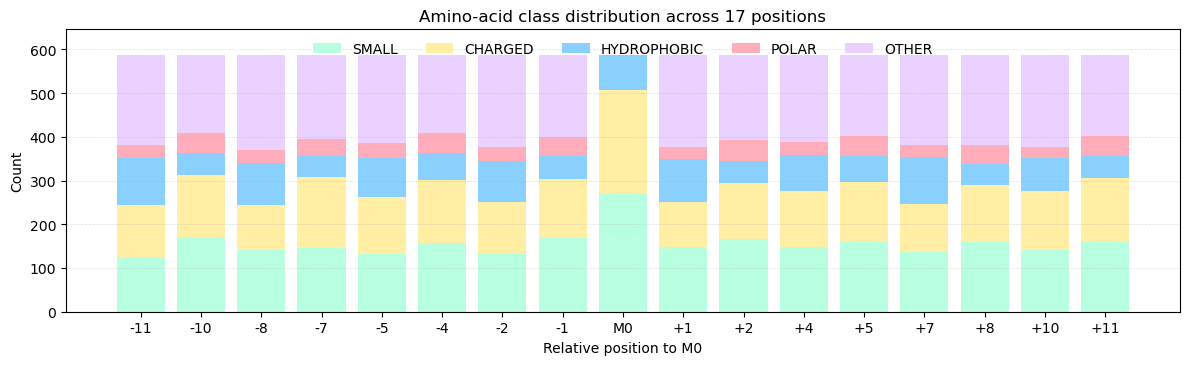

In [8]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt
from collections import Counter

# ---------- 0. 讀進你已經存好的 17×587 類別矩陣 ----------
aa17_all = np.load("D:/collagen/amino_acid_type/aa17_class.npy")
aa17_all = np.char.upper(np.char.strip(aa17_all))   # 保險：去空白→大寫

# ---------- 1. OFFSETS 與「想顯示」的順序 ----------
OFFSETS  = [ 0,-1,-2,-4,-5,-7,-8,-10,-11,  1, 2, 4, 5, 7, 8, 10,11]
SHOW_POS = [-11,-10,-8,-7,-5,-4,-2,-1, 0,  1, 2, 4, 5, 7, 8,10,11]   # ← 你要的順序

# 建立 offset -> 原欄位索引 的對照表
idx_map = {off:i for i,off in enumerate(OFFSETS)}

# 依 SHOW_POS 重新抓欄位：資料順序和 x-tick 100% 一致
aa_reorder = aa17_all[:, [idx_map[o] for o in SHOW_POS]]

# ---------- 2. 統計每個位置的類別數量 ----------
classes = ["SMALL","CHARGED","HYDROPHOBIC","POLAR","OTHER"]
counts  = {cls:[] for cls in classes}

for col in range(17):
    col_cls = aa_reorder[:,col]
    c = Counter(col_cls)
    for cls in classes:
        counts[cls].append(c.get(cls,0))

# ---------- 3. 畫堆疊長條 ----------
pos_labels = [f"{p:+d}" if p else "M0" for p in SHOW_POS]
colors = {"SMALL":"#B8FFE1","CHARGED":"#FFEEA4",
          "HYDROPHOBIC":"#89D0FF","POLAR":"#FFADBB","OTHER":"#EAD1FF"}

x = np.arange(17)
fig, ax = plt.subplots(figsize=(12,4))
bottom = np.zeros_like(x)

for cls in classes:
    ax.bar(x, counts[cls], bottom=bottom,
           color=colors[cls], label=cls)
    bottom += counts[cls]

ax.grid(True, axis="y",      # 同時畫水平+垂直
        linestyle="--", linewidth=0.5, alpha=0.4)
ax.set_xticks(x);  ax.set_xticklabels(pos_labels)
ax.set_xlabel("Relative position to M0")
ax.set_ylabel("Count")
ax.set_title("Amino-acid class distribution across 17 positions")
ax.legend(ncol=5, frameon=False, loc='upper center', bbox_to_anchor=(0.5,1))
ax.set_ylim(0, bottom.max()*1.1)
plt.tight_layout(rect=[0,0,1,0.94])
plt.show()


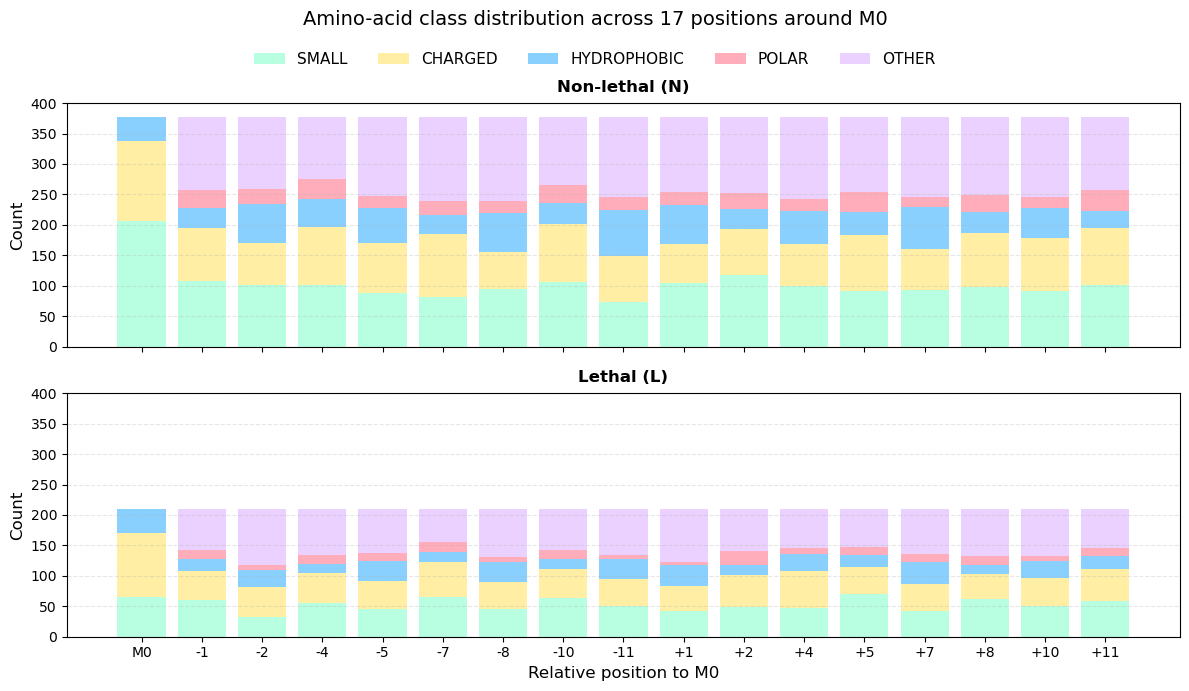

In [200]:
# 17 個相對位置標籤（順序要和 OFFSETS 一致）
POS_LABS = ['M0',
            '-1','-2','-4','-5','-7','-8','-10','-11',
             '+1','+2','+4','+5','+7','+8','+10','+11']

df_aa = pd.DataFrame(aa17_all, columns=POS_LABS)
df_aa['lethal'] = lethal_arr          # 0 = L, 1 = N
df_N = df_aa[df_aa['lethal'] == 1].drop(columns='lethal')
df_L = df_aa[df_aa['lethal'] == 0].drop(columns='lethal')

ct_N = pd.crosstab(index=df_N.values.ravel(),
                   columns=np.tile(POS_LABS, len(df_N)))
ct_L = pd.crosstab(index=df_L.values.ravel(),
                   columns=np.tile(POS_LABS, len(df_L)))

AA_ORDER = ["SMALL", "CHARGED", "HYDROPHOBIC", "POLAR", "OTHER"]
ct_N = ct_N.reindex(AA_ORDER, fill_value=0)
ct_L = ct_L.reindex(AA_ORDER, fill_value=0)

cls_colors = {
    "SMALL":        "#B8FFE1",
    "CHARGED":      "#FFEEA4",
    "HYDROPHOBIC":  "#89D0FF",
    "POLAR":        "#FFADBB",
    "OTHER":        "#EAD1FF",
}

# ──❶  兩張子圖共用同一個 y-max ──────────────────────────────
y_max = max(ct_N.values.max(), ct_L.values.max()) * 1.10      # 多 10 %
# ────────────────────────────────────────────────────────────

fig, axes = plt.subplots(2, 1, figsize=(12, 7), sharex=True)

for ax, ctab, title in zip(axes,
                           [ct_N, ct_L],
                           ['Non-lethal (N)', 'Lethal (L)']):
    bottom = np.zeros(len(POS_LABS))
    for cls in AA_ORDER:
        counts = ctab.loc[cls, POS_LABS].values
        ax.bar(POS_LABS, counts, bottom=bottom,
               color=cls_colors[cls], label=cls, width=0.8)
        bottom += counts

    ax.set_ylim(0, 400)               # ←❶ 統一 y 軸上限
    ax.set_ylabel('Count', fontsize=12)
    ax.set_title(title, fontweight='bold', pad=8)
    ax.grid(axis='y', alpha=.3, linestyle='--')

axes[-1].set_xlabel('Relative position to M0', fontsize=12)

# ──❷  圖例搬到 suptitle 正下方 ─────────────────────────────
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels,
           loc='upper center',
           bbox_to_anchor=(0.5, 0.94),   # 0.92 ≈ suptitle 下緣
           ncol=len(labels),
           frameon=False, fontsize=11)
# ────────────────────────────────────────────────────────────

plt.suptitle('Amino-acid class distribution across 17 positions around M0',
             fontsize=14, y=0.98)        # y 調高，預留圖例空間
plt.tight_layout(rect=[0, 0, 1, 0.95])   # ↑ 下壓內容，避免擠到圖例
plt.show()


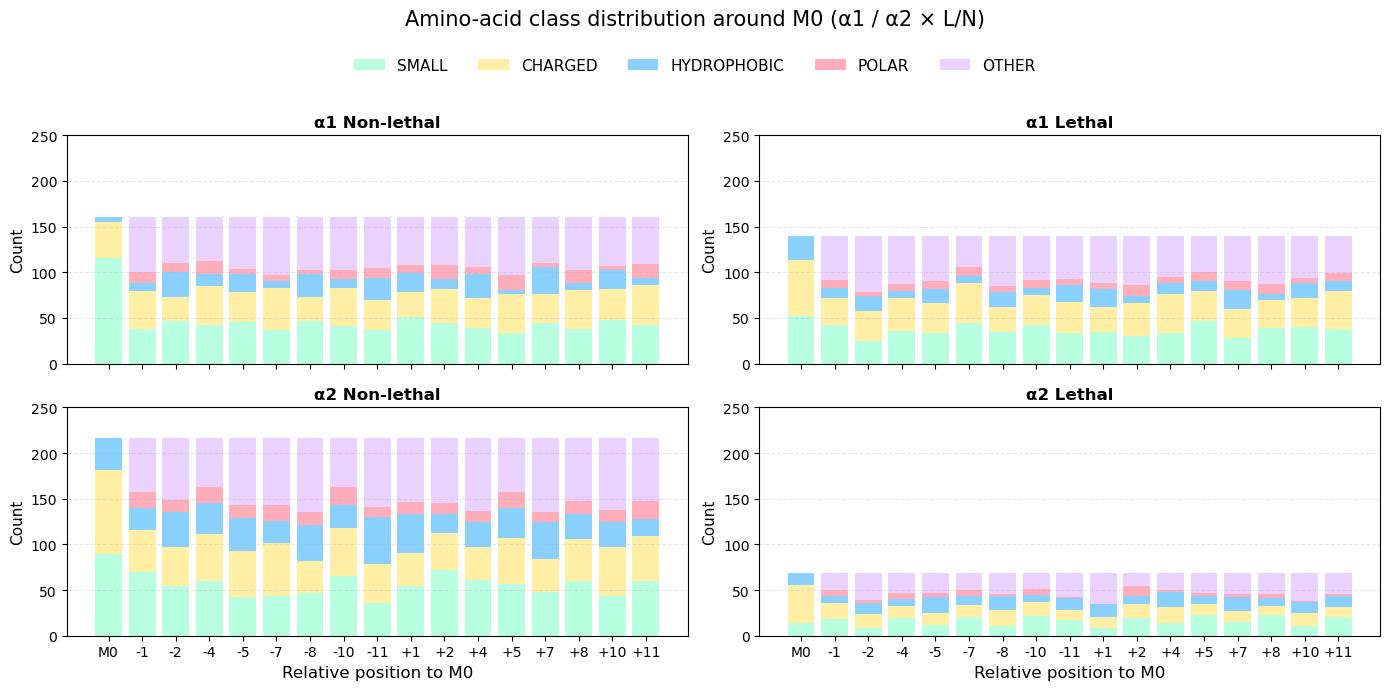

In [204]:
# 17 個相對位置標籤（順序要和 OFFSETS 一致）
POS_LABS = ['M0',
            '-1','-2','-4','-5','-7','-8','-10','-11',
             '+1','+2','+4','+5','+7','+8','+10','+11']

# --- 1. 轉成 DataFrame ------------------------------------------------
df_aa = pd.DataFrame(aa17_all, columns=POS_LABS)
df_aa['lethal']  = lethal_arr        # 0=L, 1=N
df_aa['alpha12'] = alpha12_arr       # 1=α1, 2=α2

# 四組遮罩
mask = {
    'α1 Non-lethal': (df_aa['alpha12']==1) & (df_aa['lethal']==1),
    'α1 Lethal'    : (df_aa['alpha12']==1) & (df_aa['lethal']==0),
    'α2 Non-lethal': (df_aa['alpha12']==2) & (df_aa['lethal']==1),
    'α2 Lethal'    : (df_aa['alpha12']==2) & (df_aa['lethal']==0),
}

# --- 2. 各組做 crosstab ------------------------------------------------
AA_ORDER  = ["SMALL","CHARGED","HYDROPHOBIC","POLAR","OTHER"]
cls_colors = {
    "SMALL":       "#B8FFE1",
    "CHARGED":     "#FFEEA4",
    "HYDROPHOBIC": "#89D0FF",
    "POLAR":       "#FFADBB",
    "OTHER":       "#EAD1FF",
}

ctabs = {}
for name, m in mask.items():
    tmp = df_aa[m].drop(columns=['lethal','alpha12'])
    ct  = pd.crosstab(index=tmp.values.ravel(),
                      columns=np.tile(POS_LABS, len(tmp)))
    ctabs[name] = ct.reindex(AA_ORDER, fill_value=0)

# --- 3. 統一 y-軸 ------------------------------------------------------
y_max = max(ct.values.max() for ct in ctabs.values()) * 1.10   # +10 %

# --- 4. 畫圖 -----------------------------------------------------------
fig, axes = plt.subplots(2, 2, figsize=(14, 7), sharex=True)
axes = axes.ravel()           # 方便迭代

for ax, (title, ctab) in zip(axes, ctabs.items()):
    bottom = np.zeros(len(POS_LABS))
    for cls in AA_ORDER:
        counts = ctab.loc[cls, POS_LABS].values
        ax.bar(POS_LABS, counts, bottom=bottom,
               color=cls_colors[cls], label=cls, width=0.8)
        bottom += counts

    ax.set_ylim(0, 250)
    ax.set_ylabel('Count', fontsize=11)
    ax.set_title(title, fontweight='bold', pad=6)
    ax.grid(axis='y', alpha=.3, ls='--')

# 底列 x-label
for ax in axes[-2:]:
    ax.set_xlabel('Relative position to M0', fontsize=12)

# --- 5. 共用圖例（suptitle 下方） -------------------------------------
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels,
           loc='upper center',
           bbox_to_anchor=(0.5, 0.93),   # suptitle 正下方
           ncol=len(labels),
           frameon=False, fontsize=11)

plt.suptitle('Amino-acid class distribution around M0 (α1 / α2 × L/N)',
             fontsize=15, y=0.98)
plt.tight_layout(rect=[0, 0, 1, 0.90])   # 下壓內容，避免擠到圖例
plt.show()


## rad_CYS ana

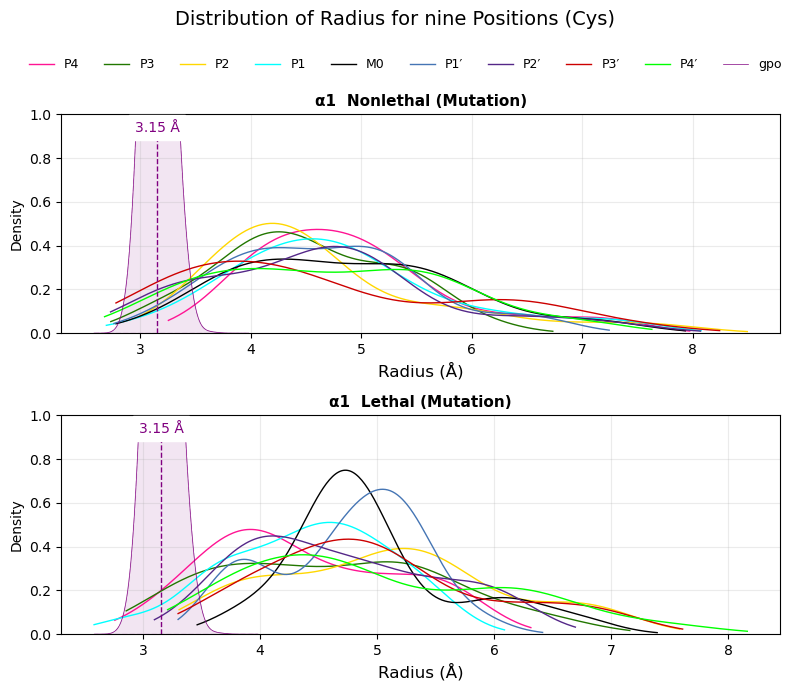

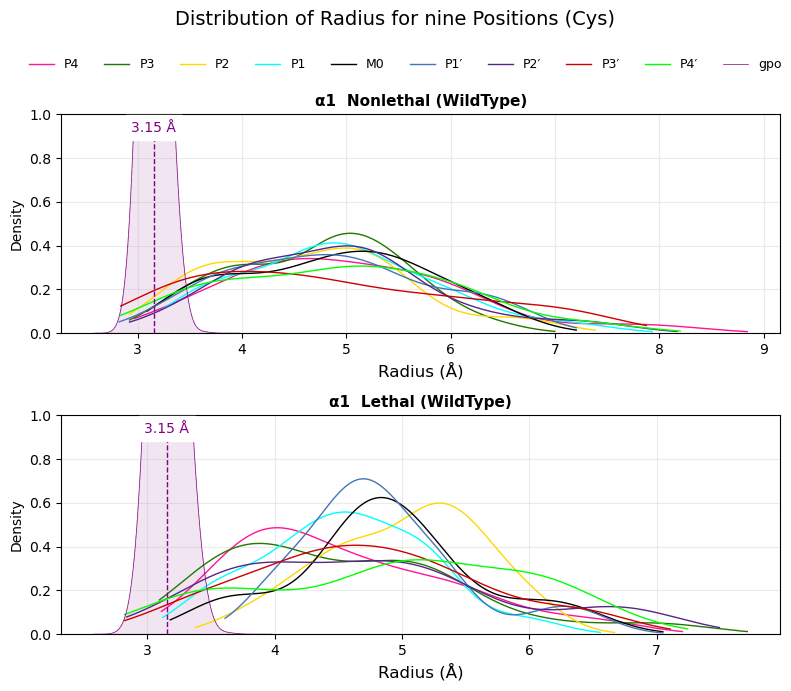

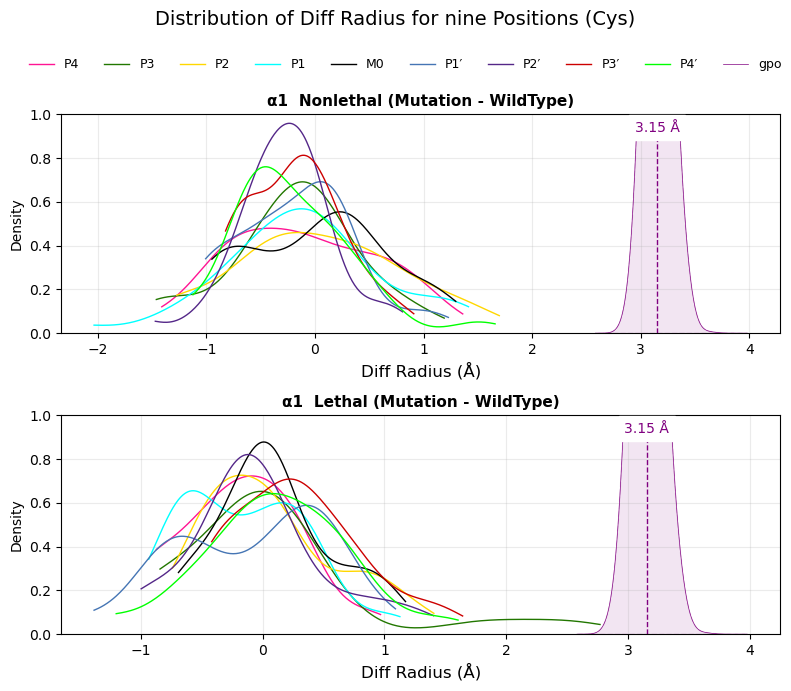

In [ ]:
# ------------------------------------------------------------
combined_vals = gpo_radius_traj[:, 1:].ravel()  # 取出索引 1–8 (即 triplet 2–9)
def plot_kde_4groups(data_all, meta, title_prefix, t_tittle,
                     pos_labels=None, colors=None,):
    """
    data_all : (587, 9)   ← 每條突變 9 個位置的平均值
    meta     : dict 必含   mutation_name, lethal_arr, alpha12_arr  (各 587)
    title_prefix : e.g. "Unit Height" 或 "Radius"
    ------------------------------------------------------------
    只畫 Cys，並拆 α1/α2 × lethal/non-lethal 四組 KDE。
    """
    if pos_labels is None:
        pos_labels = ["P4","P3","P2","P1","M0","P1′","P2′","P3′","P4′"]
    if colors is None:
        colors = ["#ff1493", "#227700", "#ffd700", "#00ffff",
                  "#000000", "#4575b4", "#542788", "#cc0000", "#00ff00"]

    # 0. 先把 meta 取出
    mut  = meta["mutation_name_arr"].astype(str)
    leth = meta["lethal_arr"]
    a12  = meta["alpha12_arr"]

    # 1. 篩 Cys
    is_cys   = mut == "CYS"
    data_cys = data_all[is_cys]
    a12_cys  = a12[is_cys]
    leth_cys = leth[is_cys]

    # 2. 四個遮罩
    mask = {
        "a1_lethal":     (a12_cys == 1) & (leth_cys == 0),
        # "a2_lethal":     (a12_cys == 2) & (leth_cys == 0),
        "a1_nonlethal":  (a12_cys == 1) & (leth_cys == 1),
        # "a2_nonlethal":  (a12_cys == 2) & (leth_cys == 1),
    }
    titles = [f"α1  Nonlethal ({t_tittle})", 
            #   "α2  Lethal",
              f"α1  Lethal ({t_tittle})", 
            #   "α2  Nonlethal"
              ]

    # 3. 整理 datasets → list(4) × list(9) of samples
    datasets = []
    for key in ["a1_nonlethal", 
                # "a2_lethal", 
                "a1_lethal", 
                # "a2_nonlethal"
                ]:
        sel = data_cys[mask[key]]              # (n, 9)
        per_pos = [sel[:, i] for i in range(9)]  # 即使 n=0 也給空陣列
        datasets.append(per_pos)

    # 4. 畫圖
    fig, axes = plt.subplots(2, 1, figsize=(8, 7))
    axes = axes.ravel()
    y_max = 0

    for ax, data9, sub_title in zip(axes, datasets, titles):
        for i, samples in enumerate(data9):
            if samples.size == 0:
                continue
            kde = gaussian_kde(samples,0.45)
            xs  = np.linspace(samples.min()*0.9, samples.max()*1.1, 300)
            ys  = kde(xs)
            ax.plot(xs, ys, color=colors[i], linewidth=1.0,
                    label=pos_labels[i])
            y_max = max(y_max, ys.max())

        # 疊上 combined triplet 2–9 的 KDE
        kde_c = gaussian_kde(combined_vals, bw_method=0.7)
        xs_c  = np.linspace(combined_vals.min()*0.9,
                            combined_vals.max()*1.1, 300)
        ys_c  = kde_c(xs_c)
        ax.plot(xs_c, ys_c, color="purple", lw=0.5, label="gpo")
        ax.fill_between(xs_c, ys_c, linestyle='--', color="purple", alpha=0.1)
        # --- 在画完合并 KDE 之后，紧接着加：
        # 计算峰值位置
        peak_idx = np.argmax(ys_c)
        peak_x   = xs_c[peak_idx]


        # 画一条竖线
        ax.axvline(peak_x, color="purple", linestyle="--", linewidth=1)

        ax.text(peak_x, 0.906,        # 固定在 0.42 < 0.45
        f"{peak_x:.2f} Å", 
        color="purple", 
        ha="center", va="bottom",
        fontsize=10,
        backgroundcolor="white")

        ax.set_title(f"{sub_title}", fontsize=11, fontweight='bold')
        ax.set_xlabel(f"{title_prefix} (Å)", fontsize=12)
        ax.grid(True, alpha=.25)

    # 左側 y label
    for ax in axes[::1]:
        ax.set_ylabel("Density")

    for ax in axes:
        ax.set_ylim(0, 1)
        # ax.set_xlim(2.5, 9)
        # ax.set_xlim(-2.1, 3.5)
        # ax.axvline(3.2145, color='r', linestyle='--', linewidth=1.2, label = 'GRO')

    handles, labels = axes[0].get_legend_handles_labels()
    fig.legend(handles, labels, ncol=10, loc=(0.03, 0.89),
               frameon=False, fontsize=9)

    fig.suptitle(f"Distribution of {title_prefix} for nine Positions (Cys)",
                 fontsize=14)
    # 1. 子圖標題
    plt.tight_layout(rect=[0, 0, 1, 0.93])
    plt.show()
    
    # 疊上 combined triplet 2–9 的 KDE
    kde_c = gaussian_kde(combined_vals, bw_method=0.7)
    xs_c  = np.linspace(combined_vals.min()*0.9,
                        combined_vals.max()*1.1, 300)
    ys_c  = kde_c(xs_c)
    ax.plot(xs_c, ys_c, color="purple", lw=1, label="gpo")
    ax.fill_between(xs_c, ys_c, linestyle='--', color="purple", alpha=0.2)
    # --- 在画完合并 KDE 之后，紧接着加：
    # 计算峰值位置
    peak_idx = np.argmax(ys_c)
    peak_x   = xs_c[peak_idx]

    # 画一条竖线
    ax.axvline(peak_x, color="purple", linestyle="--", linewidth=1)
   
# 已經算好的四個 (587, 9) 陣列

# radius_avg, radius_wt_avg, unit_hei_avg, unit_wt_avg

meta = {
    "mutation_name_arr": mutation_name_arr,
    "lethal_arr":    lethal_arr,
    "alpha12_arr":   alpha12_arr,
}


plot_kde_4groups(radius_avg,   meta, "Radius", "Mutation")
plot_kde_4groups(radius_wt_avg,    meta, "Radius", "WildType")
# plot_kde_4groups(radius_diff_avg,    meta, "Diff Radius", "Mutation - WildType")



### peaks

In [ ]:
pos_labels = ["P4","P3","P2","P1","M0","P1′","P2′","P3′","P4′"]
def kde_peaks_table(data_all, meta, bandwidth=0.45):
    """回傳每組(α1-L / α1-N) × 9位置 的 KDE peak x 值表格"""
    mut  = meta["mutation_name_arr"].astype(str)
    leth = meta["lethal_arr"]
    a12  = meta["alpha12_arr"]

    is_cys   = (mut == "CYS")
    data_cys = data_all[is_cys]
    a12_cys  = a12[is_cys]
    leth_cys = leth[is_cys]

    mask = dict(
        a1_nonlethal = (a12_cys == 1) & (leth_cys == 1),
        a1_lethal    = (a12_cys == 1) & (leth_cys == 0),
    )

    records = []   # 收集表格資料

    for group_name, msk in mask.items():
        sel = data_cys[msk]             # (n,9)
        for idx, pos in enumerate(pos_labels):
            samples = sel[:, idx]
            if samples.size == 0:
                peak = np.nan
            else:
                kde = gaussian_kde(samples, bw_method=bandwidth)
                xs  = np.linspace(samples.min()*0.9,
                                  samples.max()*1.1, 400)
                ys  = kde(xs)
                peak = xs[np.argmax(ys)]
            records.append(dict(group=group_name,
                                position=pos,
                                peak_x=peak))

    return pd.DataFrame(records)

# -------------------- 使用範例 --------------------
meta = {
    "mutation_name_arr": mutation_name_arr,
    "lethal_arr":        lethal_arr,
    "alpha12_arr":       alpha12_arr,
}

# radius_avg 與 radius_wt_avg 各做一張表
df_mut = kde_peaks_table(radius_avg,    meta)   # Mutation
df_wt  = kde_peaks_table(radius_wt_avg, meta)   # Wild-type

print("Mutation peaks")
print(df_mut.pivot(index='position', columns='group', values='peak_x')
            .reindex(pos_labels))      # 排序

print("\nWT peaks")
print(df_wt.pivot(index='position', columns='group', values='peak_x')
            .reindex(pos_labels))

# 若要存檔 CSV：
# df_mut.to_csv("radius_mut_peaks.csv", index=False)
# df_wt .to_csv("radius_wt_peaks.csv",  index=False)


Mutation peaks
group     a1_lethal  a1_nonlethal
position                         
P4         3.916695      4.602640
P3         5.077897      4.257340
P2         5.226466      4.199136
P1         4.594208      4.554529
M0         4.733293      4.291701
P1′        5.048141      4.951839
P2′        4.106485      4.764855
P3′        4.758213      3.889416
P4′        4.364284      4.055007

WT peaks
group     a1_lethal  a1_nonlethal
position                         
P4         4.024049      4.647354
P3         3.882343      5.036818
P2         5.291974      4.992196
P1         4.550017      4.878878
M0         4.837979      5.153080
P1′        4.696158      4.799621
P2′        4.797230      5.013825
P3′        4.636945      4.037582
P4′        5.137607      5.136232


### rad_CYS_pos

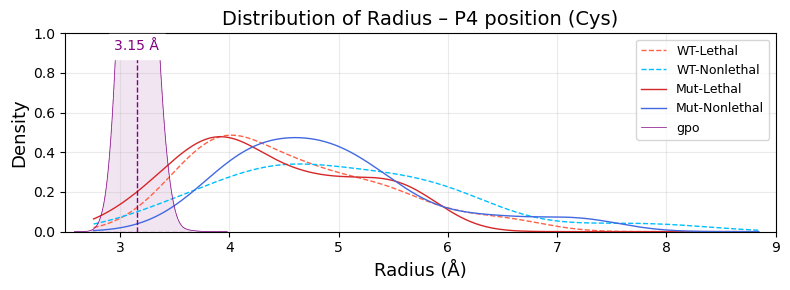

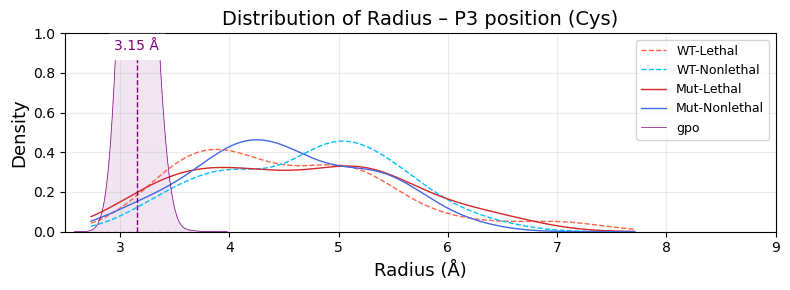

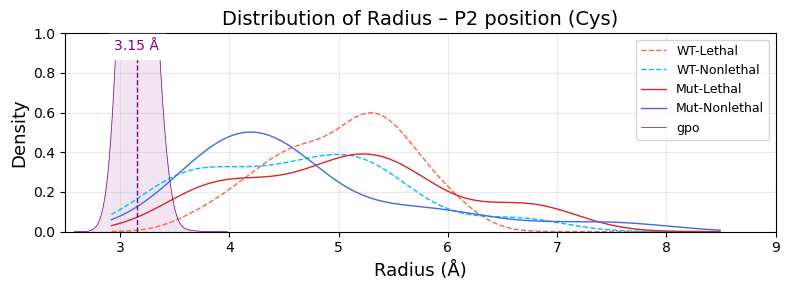

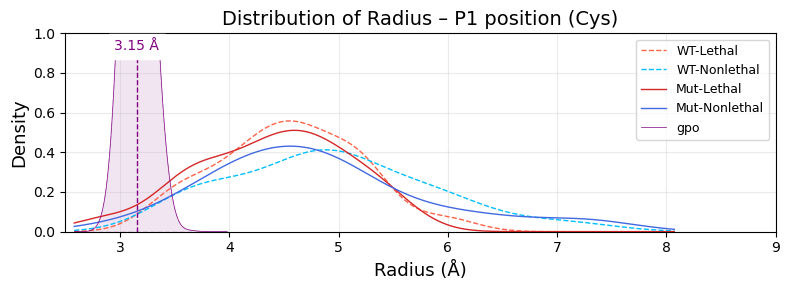

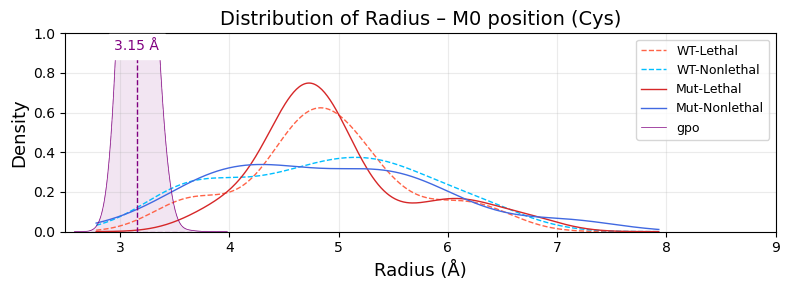

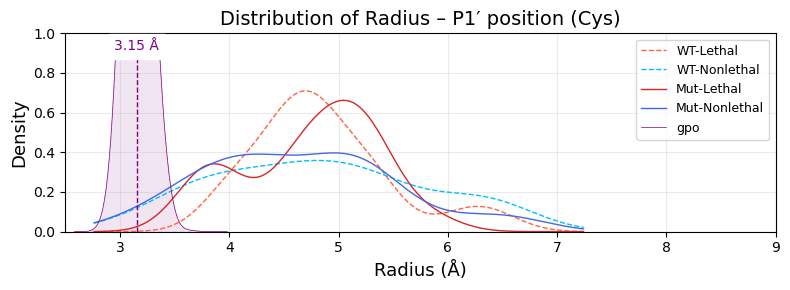

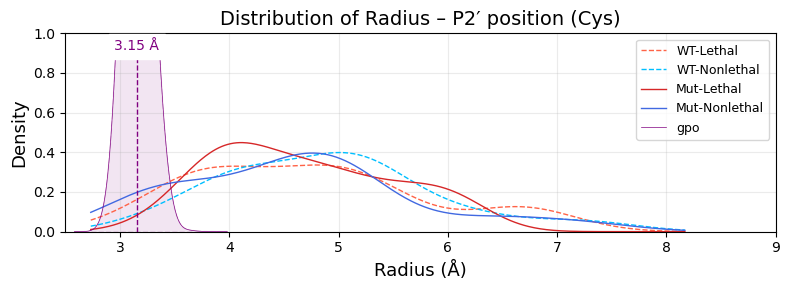

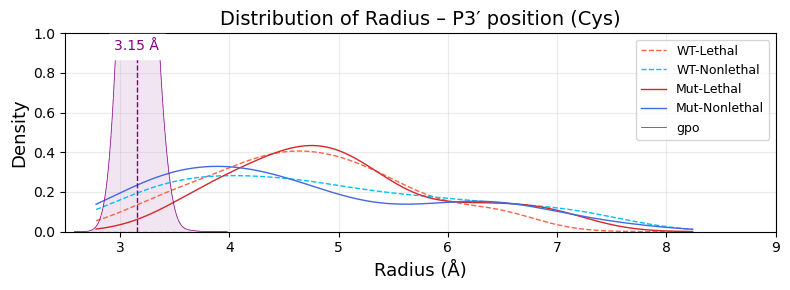

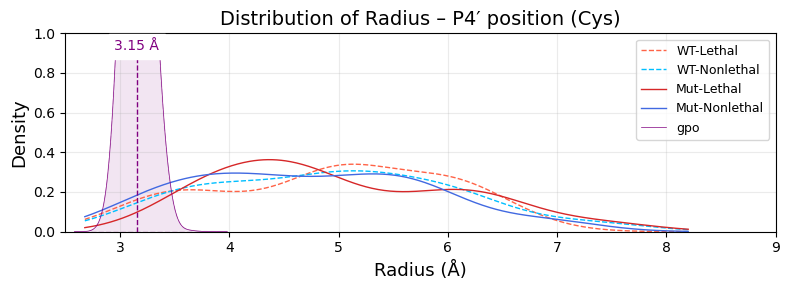

In [ ]:
# ------------------------------------------------------------
#Wt/Mut9pos各自分布圖
def plot_kde_onepos_wt_vs_mut(data_mut, data_wt, meta,
                              pos_label="M0",
                              t_title="Radius"):
    """
    data_mut : (587, 9)   ← mutant (每條 9 位置平均)
    data_wt  : (587, 9)   ← WT   (對應同 triplet 的 9 位置平均)
    meta     : dict       ← mutation_name / lethal_arr / alpha12_arr
    ------------------------------------------------------------
    只看 Cys，且僅 α1 鏈，拆成 lethal / non-lethal。
    WT 用相同遮罩對應出 WT-Lethal / WT-Nonlethal。
    """
    # --- 位置索引 ---------------------------------------------------
    pos_labels_all = ["P4","P3","P2","P1","M0","P1′","P2′","P3′","P4′"]
    idx = pos_labels_all.index(pos_label)      # 0–8

    # --- 轉 ndarray & 篩 Cys ----------------------------------------
    mut_name = np.asarray(meta["mutation_name"], dtype=str)
    lethal   = np.asarray(meta["lethal_arr"])
    alpha12  = np.asarray(meta["alpha12_arr"])

    is_cys        = mut_name == "CYS"
    mut_cys       = data_mut[is_cys]
    wt_cys        = data_wt[is_cys]
    leth_cys      = lethal[is_cys]
    a12_cys       = alpha12[is_cys]

    mask_lethal     = (a12_cys == 1) & (leth_cys == 0)
    mask_nonlethal  = (a12_cys == 1) & (leth_cys == 1)

    # --- 收集樣本 ---------------------------------------------------
    samples = dict(
        WT_L   = wt_cys[mask_lethal,    idx],
        WT_N   = wt_cys[mask_nonlethal, idx],
        MUT_L  = mut_cys[mask_lethal,    idx],
        MUT_N  = mut_cys[mask_nonlethal, idx],
    )

    # --- KDE & 繪圖 -------------------------------------------------
    # 取共同 x 範圍
    all_vals = np.concatenate([v for v in samples.values() if v.size])
    xs = np.linspace(all_vals.min()*0.9, all_vals.max()*1.1, 400)

    plt.figure(figsize=(8,3))

    style = dict(
        WT_L  = dict(color='tomato',   ls='--', lw=1, label='WT-Lethal'),
        WT_N  = dict(color='deepskyblue', ls='--', lw=1, label='WT-Nonlethal'),
        MUT_L = dict(color='#d62728', lw=1, label='Mut-Lethal'),
        MUT_N = dict(color='royalblue', lw=1, label='Mut-Nonlethal'),        
        # MUT_L = dict(color='#d62728', lw=1, label='Mut-Lethal'),
        # MUT_N = dict(color='#1f77b4', lw=1, label='Mut-Nonlethal'),
    )

    for key, vals in samples.items():
        if vals.size == 0:
            continue
        kde = gaussian_kde(vals,0.45)
        plt.plot(xs, kde(xs), **style[key])
        
    combined_vals = gpo_radius_traj[:, 1:].ravel()  # 取出索引 1–8 (即 triplet 2–9)
    # 疊上 combined triplet 2–9 的 KDE
    kde_c = gaussian_kde(combined_vals, bw_method=0.7)
    xs_c  = np.linspace(combined_vals.min()*0.9,
                        combined_vals.max()*1.1, 300)
    ys_c  = kde_c(xs_c)
    plt.plot(xs_c, ys_c, color="purple", lw=0.5, label="gpo")
    plt.fill_between(xs_c, ys_c, linestyle='--', color="purple", alpha=0.1)
    # --- 在画完合并 KDE 之后，紧接着加：
    # 计算峰值位置
    peak_idx = np.argmax(ys_c)
    peak_x   = xs_c[peak_idx]
    # 画一条竖线
    plt.axvline(peak_x, color="purple", linestyle="--", linewidth=1)

    plt.text(peak_x, 0.9,        # 固定在 0.42 < 0.45
    f"{peak_x:.2f} Å", 
    color="purple", 
    ha="center", va="bottom",
    fontsize=10,
    backgroundcolor="white")

    # 垂直參考線
    # plt.axvline(3.2145, color='red', ls=':', lw=1.0, label='GRO')

    # 軸 & 標題
    plt.xlabel(f"{t_title} (Å)", fontsize=13)
    plt.ylabel("Density",        fontsize=13)
    plt.xlim(2.5, 9)
    plt.ylim(0, 1)
    plt.title(f"Distribution of {t_title} – {pos_label} position (Cys)", fontsize=14)
    plt.legend(fontsize=9)
    plt.grid(True, alpha=.25)
    plt.tight_layout()
    plt.show()


# ------------------------------------------------------------


# === 呼叫範例 ================================================
meta = {
    "mutation_name": mutation_name_arr,
    "lethal_arr":    lethal_arr,
    "alpha12_arr":   alpha12_arr,
}

pos_labels_all = ["P4","P3","P2","P1","M0","P1′","P2′","P3′","P4′"]

for lbl in pos_labels_all:
    plot_kde_onepos_wt_vs_mut(
        radius_avg,        # mutant 資料
        radius_wt_avg,     # WT 資料
        meta,
        pos_label = lbl,   # 這一圈要畫的位置
        t_title   = "Radius"
    )


## uh_CYS ana

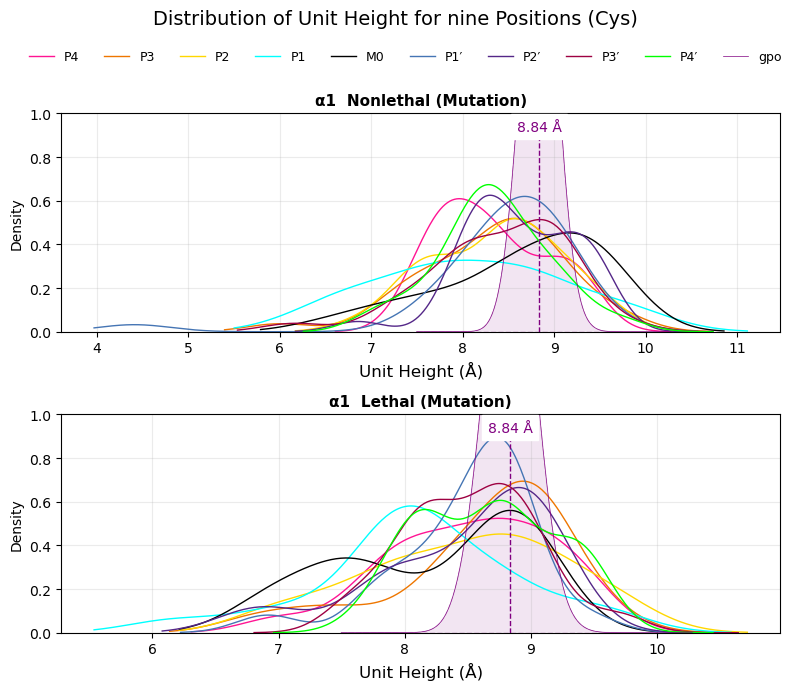

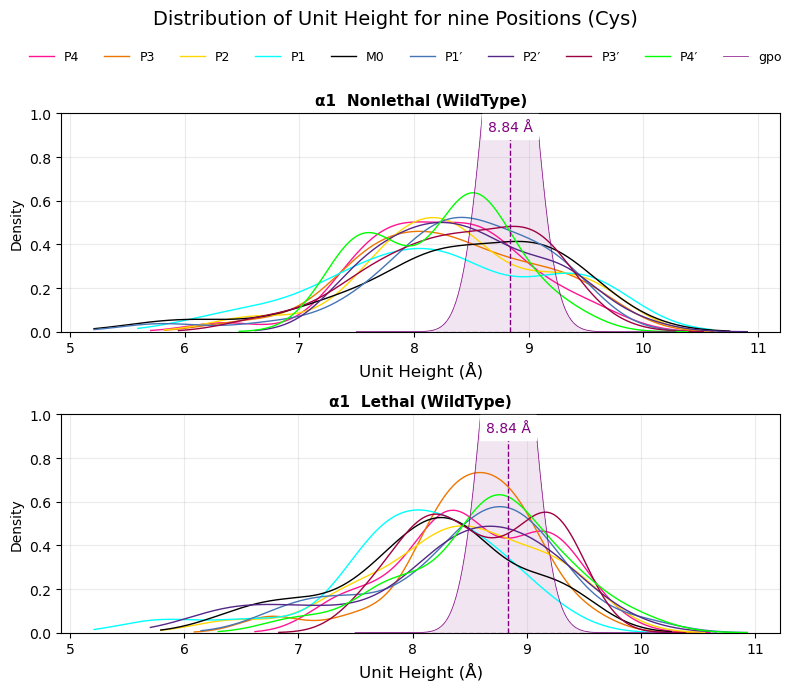

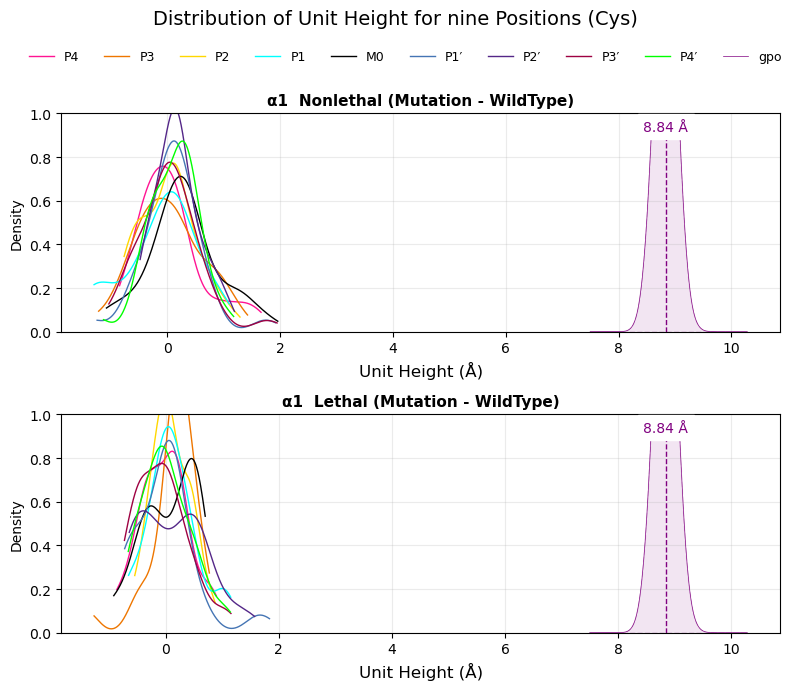

In [ ]:
# ------------------------------------------------------------
def plot_kde_4groups(data_all, meta, title_prefix, t_tittle,
                     pos_labels=None, colors=None,):
    """
    data_all : (587, 9)   ← 每條突變 9 個位置的平均值
    meta     : dict 必含   mutation_name, lethal_arr, alpha12_arr  (各 587)
    title_prefix : e.g. "Unit Height" 或 "Radius"
    ------------------------------------------------------------
    只畫 Cys，並拆 α1/α2 × lethal/non-lethal 四組 KDE。
    """
    if pos_labels is None:
        pos_labels = ["P4","P3","P2","P1","M0","P1′","P2′","P3′","P4′"]
    if colors is None:
        colors = ["#ff1493", "#ee7600", "#ffd700", "#00ffff",
                  "#000000", "#4575b4", "#542788", "#9e0142", "#00ff00"]

    # 0. 先把 meta 取出
    mut  = meta["mutation_name_arr"].astype(str)
    leth = meta["lethal_arr"]
    a12  = meta["alpha12_arr"]

    # 1. 篩 Cys
    is_cys   = mut == "CYS"
    data_cys = data_all[is_cys]
    a12_cys  = a12[is_cys]
    leth_cys = leth[is_cys]

    # 2. 四個遮罩
    mask = {
        "a1_lethal":     (a12_cys == 1) & (leth_cys == 0),
        # "a2_lethal":     (a12_cys == 2) & (leth_cys == 0),
        "a1_nonlethal":  (a12_cys == 1) & (leth_cys == 1),
        # "a2_nonlethal":  (a12_cys == 2) & (leth_cys == 1),
    }
    titles = [f"α1  Nonlethal ({t_tittle})", 
            #   "α2  Lethal",
              f"α1  Lethal ({t_tittle})", 
            #   "α2  Nonlethal"
              ]

    # 3. 整理 datasets → list(4) × list(9) of samples
    datasets = []
    for key in ["a1_nonlethal", 
                # "a2_lethal", 
                "a1_lethal", 
                # "a2_nonlethal"
                ]:
        sel = data_cys[mask[key]]              # (n, 9)
        per_pos = [sel[:, i] for i in range(9)]  # 即使 n=0 也給空陣列
        datasets.append(per_pos)

    # 4. 畫圖
    fig, axes = plt.subplots(2, 1, figsize=(8, 7))
    axes = axes.ravel()
    y_max = 0

    for ax, data9, sub_title in zip(axes, datasets, titles):
        for i, samples in enumerate(data9):
            if samples.size == 0:
                continue
            kde = gaussian_kde(samples,0.45)
            xs  = np.linspace(samples.min()*0.9, samples.max()*1.1, 300)
            ys  = kde(xs)
            ax.plot(xs, ys, color=colors[i], linewidth=1.0,
                    label=pos_labels[i])
            y_max = max(y_max, ys.max())

        ax.set_title(f"{sub_title}", fontsize=11, fontweight='bold')
        ax.set_xlabel(f"{title_prefix} (Å)", fontsize=12)
        ax.grid(True, alpha=.25)

        combined_vals = gpo_unit_hei_traj[:, 1:].ravel()  # 取出索引 1–8 (即 triplet 2–9) 
        # 疊上 combined triplet 2–9 的 KDE
        kde_c = gaussian_kde(combined_vals, bw_method=0.7)
        xs_c  = np.linspace(combined_vals.min()*0.9,
                            combined_vals.max()*1.1, 300)
        ys_c  = kde_c(xs_c)
        ax.plot(xs_c, ys_c, color="purple", lw=0.5, label="gpo")
        ax.fill_between(xs_c, ys_c, linestyle='--', color="purple", alpha=0.1)
        # --- 在画完合并 KDE 之后，紧接着加：
        # 计算峰值位置
        peak_idx = np.argmax(ys_c)
        peak_x   = xs_c[peak_idx]

        # 画一条竖线
        ax.axvline(peak_x, color="purple", linestyle="--", linewidth=1)
        ax.text(peak_x, 0.906,        # 固定在 0.42 < 0.45
        f"{peak_x:.2f} Å", 
        color="purple", 
        ha="center", va="bottom",
        fontsize=10,
        backgroundcolor="white")
        
    # 左側 y label
    for ax in axes[::1]:
        ax.set_ylabel("Density")

    for ax in axes:
        ax.set_ylim(0, 1)
        # ax.set_xlim(3.9, 11.2)
        # ax.set_xlim(-1.5, 9)
        # ax.axvline(8.923, color='r', linestyle='--', linewidth=1.2, label = 'GRO')

    handles, labels = axes[0].get_legend_handles_labels()
    fig.legend(handles, labels, ncol=10, loc=(0.03, 0.9),
               frameon=False, fontsize=9)

    fig.suptitle(f"Distribution of {title_prefix} for nine Positions (Cys)",
                 fontsize=14)
    # 1. 子圖標題
    plt.tight_layout(rect=[0, 0, 1, 0.93])
    plt.show()

# 已經算好的四個 (587, 9) 陣列

# radius_avg, radius_wt_avg, unit_hei_avg, unit_wt_avg

meta = {
    "mutation_name_arr": mutation_name_arr,
    "lethal_arr":    lethal_arr,
    "alpha12_arr":   alpha12_arr,
}
plot_kde_4groups(unit_hei_avg,   meta, "Unit Height", "Mutation")
plot_kde_4groups(unit_wt_avg,    meta, "Unit Height", "WildType")
# plot_kde_4groups(unit_hei_diff_avg,    meta, "Unit Height", "Mutation - WildType")


### peaks

In [16]:
pos_labels = ["P4","P3","P2","P1","M0","P1′","P2′","P3′","P4′"]
def kde_peaks_table(data_all, meta, bandwidth=0.45):
    """回傳每組(α1-L / α1-N) × 9位置 的 KDE peak x 值表格"""
    mut  = meta["mutation_name_arr"].astype(str)
    leth = meta["lethal_arr"]
    a12  = meta["alpha12_arr"]

    is_cys   = (mut == "CYS")
    data_cys = data_all[is_cys]
    a12_cys  = a12[is_cys]
    leth_cys = leth[is_cys]

    mask = dict(
        a1_nonlethal = (a12_cys == 1) & (leth_cys == 1),
        a1_lethal    = (a12_cys == 1) & (leth_cys == 0),
    )

    records = []   # 收集表格資料

    for group_name, msk in mask.items():
        sel = data_cys[msk]             # (n,9)
        for idx, pos in enumerate(pos_labels):
            samples = sel[:, idx]
            if samples.size == 0:
                peak = np.nan
            else:
                kde = gaussian_kde(samples, bw_method=bandwidth)
                xs  = np.linspace(samples.min()*0.9,
                                  samples.max()*1.1, 400)
                ys  = kde(xs)
                peak = xs[np.argmax(ys)]
            records.append(dict(group=group_name,
                                position=pos,
                                peak_x=peak))

    return pd.DataFrame(records)

# -------------------- 使用範例 --------------------
meta = {
    "mutation_name_arr": mutation_name_arr,
    "lethal_arr":        lethal_arr,
    "alpha12_arr":       alpha12_arr,
}

# unit_hei_avg 與 unit_hei_wt_avg 各做一張表
df_mut = kde_peaks_table(unit_hei_avg,    meta)   # Mutation
df_wt  = kde_peaks_table(unit_wt_avg, meta)   # Wild-type

print("Mutation peaks")
print(df_mut.pivot(index='position', columns='group', values='peak_x')
            .reindex(pos_labels))      # 排序

print("\nWT peaks")
print(df_wt.pivot(index='position', columns='group', values='peak_x')
            .reindex(pos_labels))

# 若要存檔 CSV：
# df_mut.to_csv("unit_hei_mut_peaks.csv", index=False)
# df_wt .to_csv("unit_hei_wt_peaks.csv",  index=False)


Mutation peaks
group     a1_lethal  a1_nonlethal
position                         
P4         8.743817      7.965980
P3         8.934693      8.553411
P2         8.763550      8.575977
P1         8.043843      8.046799
M0         8.835493      9.168375
P1′        8.731160      8.683104
P2′        8.905988      8.304658
P3′        8.749154      8.842423
P4′        8.759384      8.279428

WT peaks
group     a1_lethal  a1_nonlethal
position                         
P4         8.347347      8.050206
P3         8.588498      8.051710
P2         8.434009      8.168832
P1         8.054659      8.049825
M0         8.249454      8.903862
P1′        8.761697      8.409058
P2′        8.685639      8.237568
P3′        9.164927      8.868812
P4′        8.759500      8.514565


### uh_CYS_pos

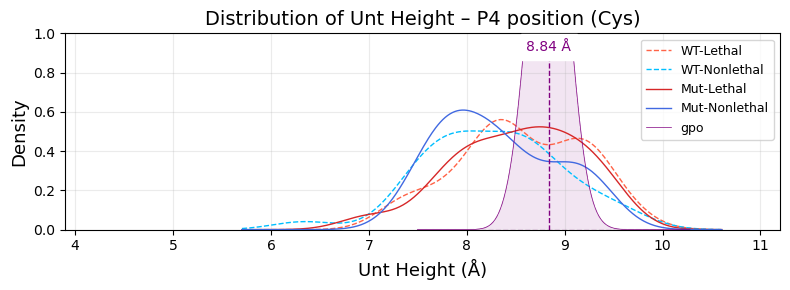

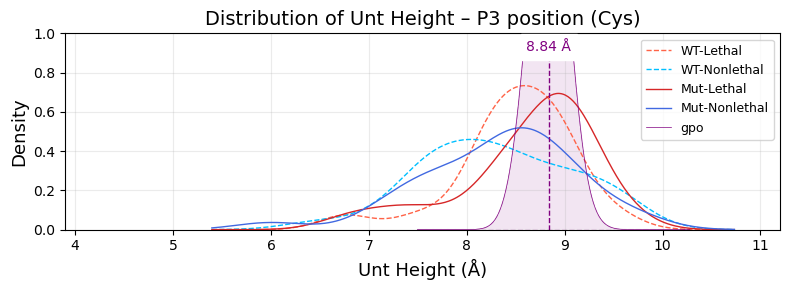

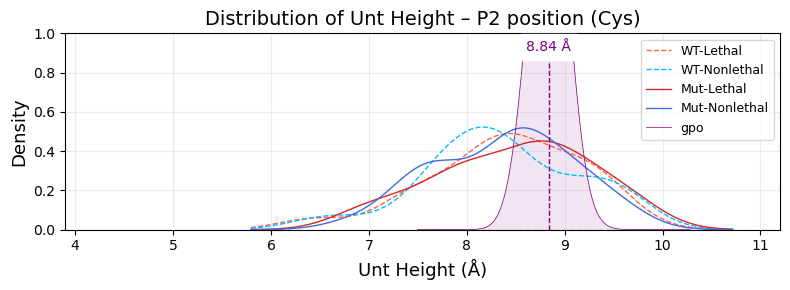

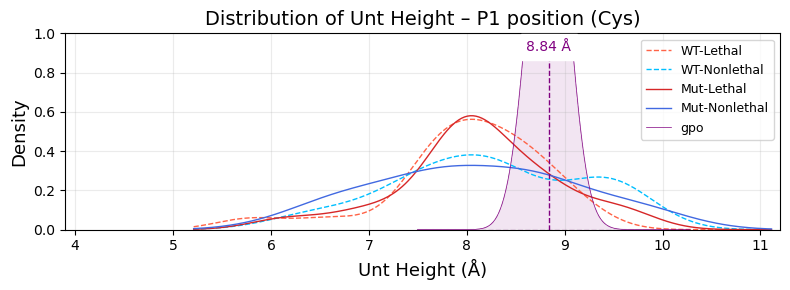

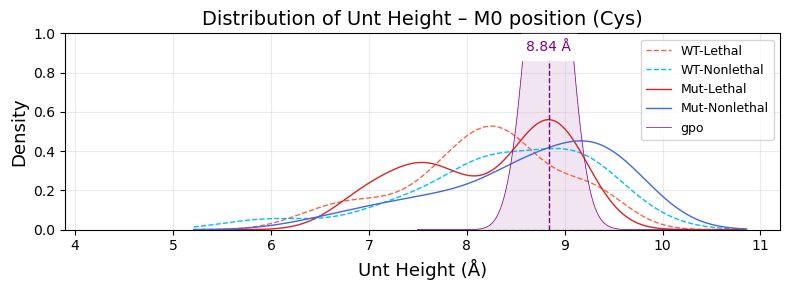

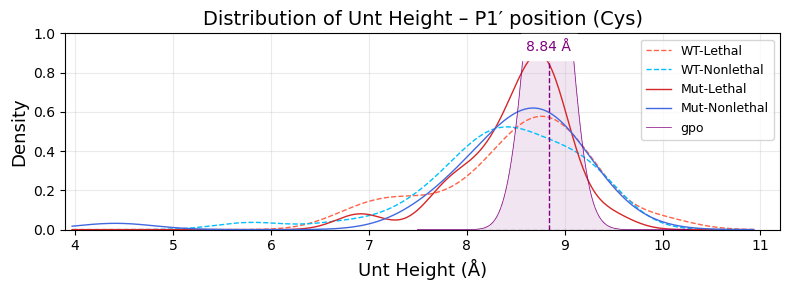

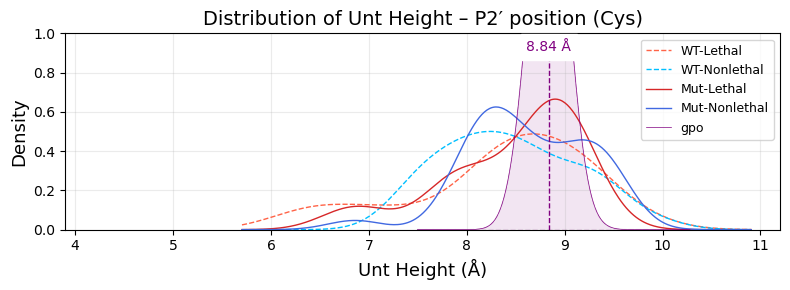

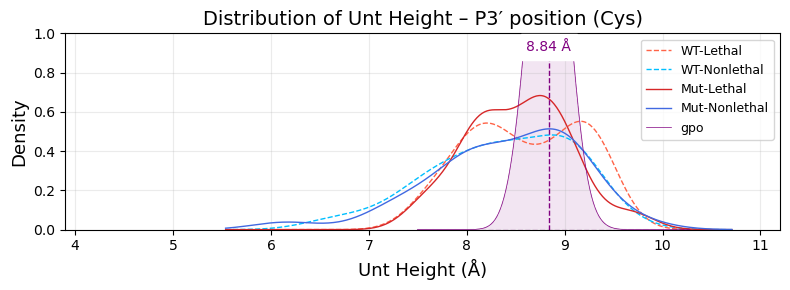

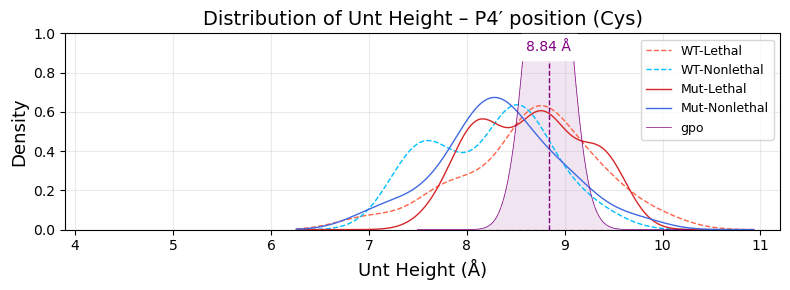

In [12]:
# ------------------------------------------------------------
#Wt/Mut9pos各自分布圖
def plot_kde_onepos_wt_vs_mut(data_mut, data_wt, meta,
                              pos_label="M0",
                              t_title="Unit Height"):
    """
    data_mut : (587, 9)   ← mutant (每條 9 位置平均)
    data_wt  : (587, 9)   ← WT   (對應同 triplet 的 9 位置平均)
    meta     : dict       ← mutation_name / lethal_arr / alpha12_arr
    ------------------------------------------------------------
    只看 Cys，且僅 α1 鏈，拆成 lethal / non-lethal。
    WT 用相同遮罩對應出 WT-Lethal / WT-Nonlethal。
    """
    # --- 位置索引 ---------------------------------------------------
    pos_labels_all = ["P4","P3","P2","P1","M0","P1′","P2′","P3′","P4′"]
    idx = pos_labels_all.index(pos_label)      # 0–8

    # --- 轉 ndarray & 篩 Cys ----------------------------------------
    mut_name = np.asarray(meta["mutation_name"], dtype=str)
    lethal   = np.asarray(meta["lethal_arr"])
    alpha12  = np.asarray(meta["alpha12_arr"])

    is_cys        = mut_name == "CYS"
    mut_cys       = data_mut[is_cys]
    wt_cys        = data_wt[is_cys]
    leth_cys      = lethal[is_cys]
    a12_cys       = alpha12[is_cys]

    mask_lethal     = (a12_cys == 1) & (leth_cys == 0)
    mask_nonlethal  = (a12_cys == 1) & (leth_cys == 1)

    # --- 收集樣本 ---------------------------------------------------
    samples = dict(
        WT_L   = wt_cys[mask_lethal,    idx],
        WT_N   = wt_cys[mask_nonlethal, idx],
        MUT_L  = mut_cys[mask_lethal,    idx],
        MUT_N  = mut_cys[mask_nonlethal, idx],
    )

    # --- KDE & 繪圖 -------------------------------------------------
    # 取共同 x 範圍
    all_vals = np.concatenate([v for v in samples.values() if v.size])
    xs = np.linspace(all_vals.min()*0.9, all_vals.max()*1.1, 400)

    plt.figure(figsize=(8,3))

    style = dict(
        WT_L  = dict(color='tomato',   ls='--', lw=1, label='WT-Lethal'),
        WT_N  = dict(color='deepskyblue', ls='--', lw=1, label='WT-Nonlethal'),
        MUT_L = dict(color='#d62728', lw=1, label='Mut-Lethal'),
        MUT_N = dict(color='royalblue', lw=1, label='Mut-Nonlethal'),        
        # MUT_L = dict(color='#d62728', lw=1, label='Mut-Lethal'),
        # MUT_N = dict(color='#1f77b4', lw=1, label='Mut-Nonlethal'),
    )

    for key, vals in samples.items():
        if vals.size == 0:
            continue
        kde = gaussian_kde(vals,0.45)
        plt.plot(xs, kde(xs), **style[key])

    combined_vals = gpo_unit_hei_traj[:, 1:].ravel()  # 取出索引 1–8 (即 triplet 2–9)
    # 疊上 combined triplet 2–9 的 KDE
    kde_c = gaussian_kde(combined_vals, bw_method=0.7)
    xs_c  = np.linspace(combined_vals.min()*0.9,
                        combined_vals.max()*1.1, 300)
    ys_c  = kde_c(xs_c)
    plt.plot(xs_c, ys_c, color="purple", lw=0.5, label="gpo")
    plt.fill_between(xs_c, ys_c, linestyle='--', color="purple", alpha=0.1)
    # --- 在画完合并 KDE 之后，紧接着加：
    # 计算峰值位置
    peak_idx = np.argmax(ys_c)
    peak_x   = xs_c[peak_idx]
    # 画一条竖线
    plt.axvline(peak_x, color="purple", linestyle="--", linewidth=1)

    plt.text(peak_x, 0.895,        # 固定在 0.42 < 0.45
    f"{peak_x:.2f} Å", 
    color="purple", 
    ha="center", va="bottom",
    fontsize=10,
    backgroundcolor="white")


    # 垂直參考線
    # plt.axvline(8.923, color='red', ls=':', lw=1.0, label='GRO')

    # 軸 & 標題
    plt.xlabel(f"{t_title} (Å)", fontsize=13)
    plt.ylabel("Density",        fontsize=13)
    plt.xlim(3.9, 11.2)
    plt.ylim(0, 1)
    plt.title(f"Distribution of {t_title} – {pos_label} position (Cys)", fontsize=14)
    plt.legend(fontsize=9)
    plt.grid(True, alpha=.25)
    plt.tight_layout()
    plt.show()
# ------------------------------------------------------------


# === 呼叫範例 ================================================
meta = {
    "mutation_name": mutation_name_arr,
    "lethal_arr":    lethal_arr,
    "alpha12_arr":   alpha12_arr,
}

pos_labels_all = ["P4","P3","P2","P1","M0","P1′","P2′","P3′","P4′"]

for lbl in pos_labels_all:
    plot_kde_onepos_wt_vs_mut(
        unit_hei_avg,        # mutant 資料
        unit_wt_avg,     # WT 資料
        meta,
        pos_label = lbl,   # 這一圈要畫的位置
        t_title   = "Unt Height"
    )


### uh_CYS_M0

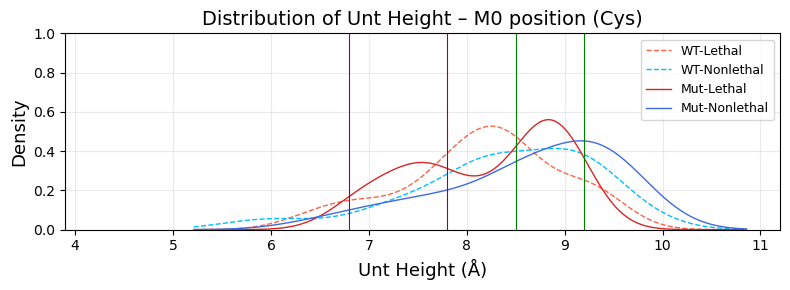

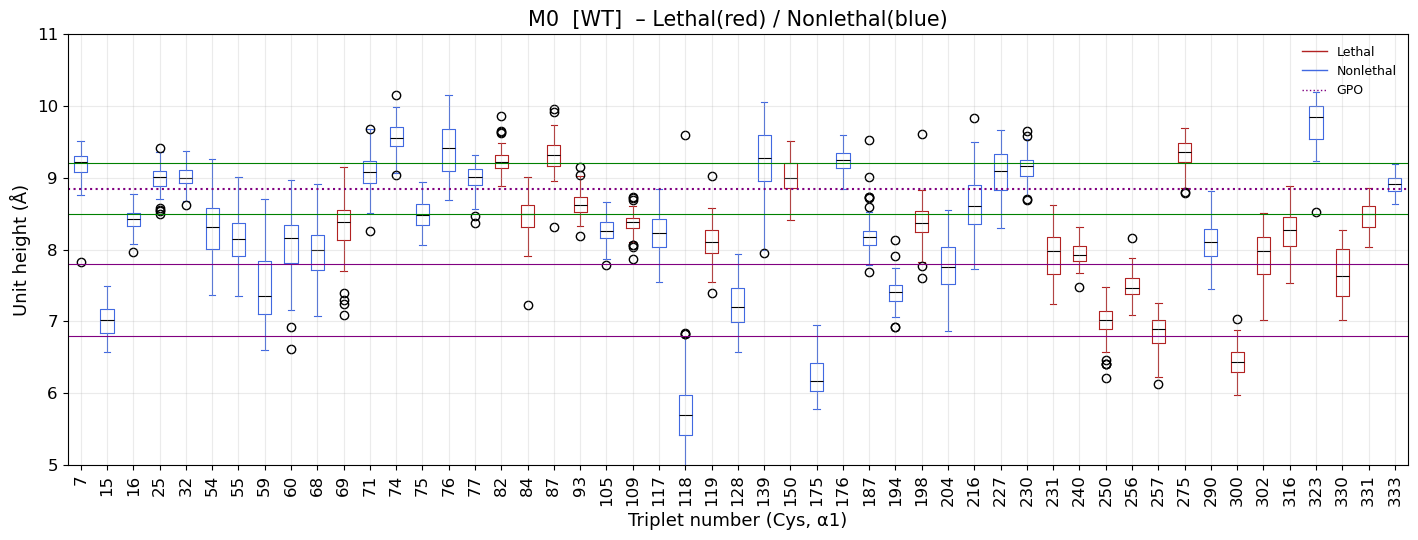

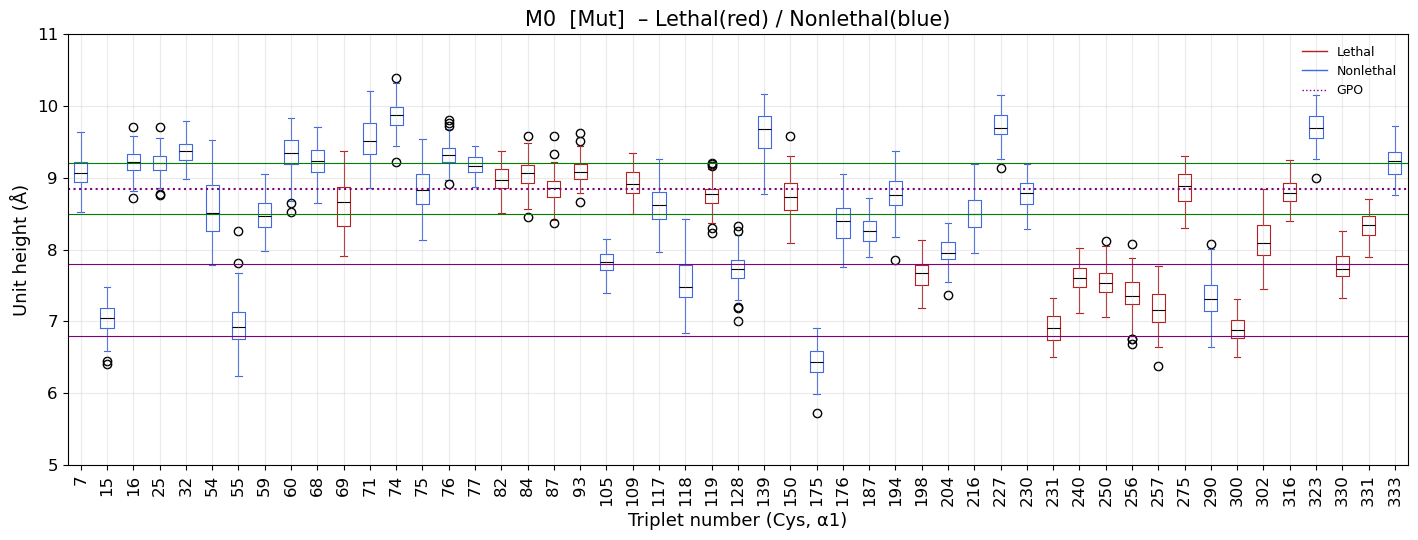

In [ ]:
# ------------------------------------------------------------
def plot_kde_onepos_wt_vs_mut(data_mut, data_wt, meta,
                              pos_label="M0",
                              t_title="Unit Height"):
    """
    data_mut : (587, 9)   ← mutant (每條 9 位置平均)
    data_wt  : (587, 9)   ← WT   (對應同 triplet 的 9 位置平均)
    meta     : dict       ← mutation_name / lethal_arr / alpha12_arr
    ------------------------------------------------------------
    只看 Cys，且僅 α1 鏈，拆成 lethal / non-lethal。
    WT 用相同遮罩對應出 WT-Lethal / WT-Nonlethal。
    """
    # --- 位置索引 ---------------------------------------------------
    pos_labels_all = ["P4","P3","P2","P1","M0","P1′","P2′","P3′","P4′"]
    idx = pos_labels_all.index(pos_label)      # 0–8

    # --- 轉 ndarray & 篩 Cys ----------------------------------------
    mut_name = np.asarray(meta["mutation_name"], dtype=str)
    lethal   = np.asarray(meta["lethal_arr"])
    alpha12  = np.asarray(meta["alpha12_arr"])

    is_cys        = mut_name == "CYS"
    mut_cys       = data_mut[is_cys]
    wt_cys        = data_wt[is_cys]
    leth_cys      = lethal[is_cys]
    a12_cys       = alpha12[is_cys]

    mask_lethal     = (a12_cys == 1) & (leth_cys == 0)
    mask_nonlethal  = (a12_cys == 1) & (leth_cys == 1)

    # --- 收集樣本 ---------------------------------------------------
    samples = dict(
        WT_L   = wt_cys[mask_lethal,    idx],
        WT_N   = wt_cys[mask_nonlethal, idx],
        MUT_L  = mut_cys[mask_lethal,    idx],
        MUT_N  = mut_cys[mask_nonlethal, idx],
    )

    # --- KDE & 繪圖 -------------------------------------------------
    # 取共同 x 範圍
    all_vals = np.concatenate([v for v in samples.values() if v.size])
    xs = np.linspace(all_vals.min()*0.9, all_vals.max()*1.1, 400)

    plt.figure(figsize=(8,3))

    style = dict(
        WT_L  = dict(color='tomato',   ls='--', lw=1, label='WT-Lethal'),
        WT_N  = dict(color='deepskyblue', ls='--', lw=1, label='WT-Nonlethal'),
        MUT_L = dict(color='#d62728', lw=1, label='Mut-Lethal'),
        MUT_N = dict(color='royalblue', lw=1, label='Mut-Nonlethal'),        
        # MUT_L = dict(color='#d62728', lw=1, label='Mut-Lethal'),
        # MUT_N = dict(color='#1f77b4', lw=1, label='Mut-Nonlethal'),
    )

    for key, vals in samples.items():
        if vals.size == 0:
            continue
        kde = gaussian_kde(vals,0.45)
        plt.plot(xs, kde(xs), **style[key])

    combined_vals = gpo_unit_hei_traj[:, 1:].ravel()  # 取出索引 1–8 (即 triplet 2–9)
    # 疊上 combined triplet 2–9 的 KDE
    kde_c = gaussian_kde(combined_vals, bw_method=0.7)
    xs_c  = np.linspace(combined_vals.min()*0.9,
                        combined_vals.max()*1.1, 300)
    ys_c  = kde_c(xs_c)
    # plt.plot(xs_c, ys_c, color="purple", lw=0.5, label="gpo")
    # plt.fill_between(xs_c, ys_c, linestyle='--', color="purple", alpha=0.1)
    # --- 在画完合并 KDE 之后，紧接着加：
    # 计算峰值位置
    peak_idx = np.argmax(ys_c)
    peak_x   = xs_c[peak_idx]
    # 画一条竖线
    # plt.axvline(peak_x, color="purple", linestyle="--", linewidth=1)

    # plt.text(peak_x, 0.895,        # 固定在 0.42 < 0.45
    # f"{peak_x:.2f} Å", 
    # color="purple", 
    # ha="center", va="bottom",
    # fontsize=10,
    # backgroundcolor="white")


    # 垂直參考線
    # plt.axvline(8.923, color='red', ls=':', lw=1.0, label='GRO')
    # plt.vlines(x=[7.8, 8.5], ymin =[0, 0], ymax = [1, 1], color='red', lw=1.0)
    plt.vlines(x=[6.8, 7.8], ymin =[0, 0], ymax = [1, 1], color='purple', lw=0.8)
    plt.vlines(x=[8.5, 9.2], ymin =[0, 0], ymax = [1, 1], color='green', lw=0.8)
    # 軸 & 標題
    plt.xlabel(f"{t_title} (Å)", fontsize=13)
    plt.ylabel("Density",        fontsize=13)
    plt.xlim(3.9, 11.2)
    plt.ylim(0, 1)
    plt.title(f"Distribution of {t_title} – {pos_label} position (Cys)", fontsize=14)
    plt.legend(fontsize=9)
    plt.grid(True, alpha=.25)
    plt.tight_layout()
    plt.show()
# ------------------------------------------------------------


# === 呼叫範例 ================================================
meta = {
    "mutation_name": mutation_name_arr,
    "lethal_arr":    lethal_arr,
    "alpha12_arr":   alpha12_arr,
}

pos_labels_all = ["M0"]

for lbl in pos_labels_all:
    plot_kde_onepos_wt_vs_mut(
        unit_hei_avg,        # mutant 資料
        unit_wt_avg,     # WT 資料
        meta,
        pos_label = lbl,   # 這一圈要畫的位置
        t_title   = "Unt Height"
    )
# ----------------------------------------------------------------------------------------------------------------------------
# ── 0. 所有相對位置與 column 索引對照 ───────────────────────────
pos_labels = ["P4","P3","P2","P1","M0","P1′","P2′","P3′","P4′"]
idx_map    = {lab: i for i, lab in enumerate(pos_labels)}   # e.g. 'M0'→4

# ── 1. 把整段流程包成函式，傳入想看的位置 ──────────────────────
def plot_unithei_box(pos_label="M0"):
    idx = idx_map[pos_label]          # 取得該位置對應 column

    # ==== 以下整塊就是你原本的程式，唯一把 idx_M0 改成 idx ====
    mut_name = np.asarray(mutation_name_arr, dtype=str)
    lethal   = np.asarray(lethal_arr)
    alpha12  = np.asarray(alpha12_arr)

    mask = (mut_name == "CYS") & (alpha12 == 1)
    ###資料來源
    for k, data in enumerate([unit_hei_wt, unit_hei_all]):
        unit_cys = data[mask]
        ##資料分類
        leth_cys = lethal[mask]
        trip_cys = np.asarray(triplet_number)[mask]

        rows = []
        for i in range(unit_cys.shape[0]):
            triplet = trip_cys[i]
            status  = 'L' if leth_cys[i] == 0 else 'N'
            for v in unit_cys[i, :, idx]:       # ★ 用 idx
                rows.append((triplet, status, v))

        df = pd.DataFrame(rows, columns=['triplet', 'status', 'value'])
        df.sort_values('triplet', inplace=True)

        triplets_sorted = df['triplet'].unique()
        n_groups = len(triplets_sorted)
        positions = np.arange(n_groups) + 1

        plt.figure(figsize=(max(6, n_groups*0.28), 5.5))

        data_all = [df.loc[df.triplet == t, 'value'] for t in triplets_sorted]
        trip_status = {t: ('L' if (df[(df.triplet==t) & (df.status=='L')].shape[0] > 0)
                        else 'N')
                    for t in triplets_sorted}

        bp = plt.boxplot(
            data_all, positions=positions,
            patch_artist=False,
            boxprops     = dict(linewidth=1.2),
            whiskerprops = dict(linewidth=1.2),
            capprops     = dict(linewidth=1.2),
            medianprops  = dict(linewidth=1.2, color='black'),
            zorder=1
        )

        for j, t in enumerate(triplets_sorted):
            color = 'firebrick' if trip_status[t] == 'L' else 'royalblue'
            bp['boxes'][j].set_color(color)
            bp['whiskers'][2*j  ].set_color(color)
            bp['whiskers'][2*j+1].set_color(color)
            bp['caps'][2*j     ].set_color(color)
            bp['caps'][2*j+1   ].set_color(color)

        plt.xticks(positions, triplets_sorted, rotation=90, fontsize=13)
        plt.yticks(fontsize=13)
        plt.ylabel("Unit height (Å)", fontsize=13)
        plt.xlabel("Triplet number (Cys, α1)", fontsize=13)
        plt.ylim(5,11)
        if k == 0 :
            plt.title(f"{pos_label} WildType - Lethal/Nonlethal", fontsize=15)
        if k == 1 :
            plt.title(f"{pos_label} Mutation - Lethal/Nonlethal", fontsize=15)
        plt.grid(alpha=.25)
        plt.axhline(8.84, color='purple', ls=':', lw=2.0, label='GRO')
        # plt.hlines(y=[7.8, 8.5], xmin =[0.5, 0.5], xmax = [51.5, 51.5], color='red', lw=1.0)
        plt.hlines(y=[6.8, 7.8], xmin =[0.5, 0.5], xmax = [51.5, 51.5], color='purple', lw=0.8)
        plt.hlines(y=[8.5, 9.2], xmin =[0.5, 0.5], xmax = [51.5, 51.5], color='green', lw=0.8)
        plt.legend(handles=[
                plt.Line2D([0], [0], color='firebrick',  lw=1, label='Lethal'),
                plt.Line2D([0], [0], color='royalblue', lw=1, label='Nonlethal'),
                plt.Line2D([0], [0], color='purple', ls=':', lw=1, label='GPO')
            ], frameon=False, loc='upper right', fontsize=9)
        plt.tight_layout()
        plt.show()
    # plt.savefig(f"unithei_{pos_label}.png", dpi=300)

# ── 2. 想看哪個位置就呼叫哪個 ────────────────────────────────
plot_unithei_box("M0")    


In [ ]:
# ── 0. 所有相對位置與 column 索引對照 ───────────────────────────
pos_labels = ["P4","P3","P2","P1","M0","P1′","P2′","P3′","P4′"]
idx_map    = {lab: i for i, lab in enumerate(pos_labels)}   # e.g. 'M0'→4

# ── 1. 把整段流程包成函式，傳入想看的位置 ──────────────────────
def plot_unithei_box(pos_label="M0"):
    idx = idx_map[pos_label]          # 取得該位置對應 column

    # ==== 以下整塊就是你原本的程式，唯一把 idx_M0 改成 idx ====
    mut_name = np.asarray(mutation_name_arr, dtype=str)
    lethal   = np.asarray(lethal_arr)
    alpha12  = np.asarray(alpha12_arr)

    mask = (mut_name == "CYS") & (alpha12 == 1)
    unit_cys = unit_hei_all[mask]
    leth_cys = lethal[mask]
    trip_cys = np.asarray(triplet_number)[mask]

    rows = []
    for i in range(unit_cys.shape[0]):
        triplet = trip_cys[i]
        status  = 'L' if leth_cys[i] == 0 else 'N'
        for v in unit_cys[i, :, idx]:       # ★ 用 idx
            rows.append((triplet, status, v))

    df = pd.DataFrame(rows, columns=['triplet', 'status', 'value'])
    df.sort_values('triplet', inplace=True)

    triplets_sorted = df['triplet'].unique()
    n_groups = len(triplets_sorted)
    positions = np.arange(n_groups) + 1

    plt.figure(figsize=(max(6, n_groups*0.28), 5.5))

    data_all = [df.loc[df.triplet == t, 'value'] for t in triplets_sorted]
    trip_status = {t: ('L' if (df[(df.triplet==t) & (df.status=='L')].shape[0] > 0)
                       else 'N')
                   for t in triplets_sorted}

    bp = plt.boxplot(
        data_all, positions=positions,
        patch_artist=False,
        boxprops     = dict(linewidth=1.2),
        whiskerprops = dict(linewidth=1.2),
        capprops     = dict(linewidth=1.2),
        medianprops  = dict(linewidth=1.2, color='black'),
        zorder=1
    )

    for j, t in enumerate(triplets_sorted):
        color = 'firebrick' if trip_status[t] == 'L' else 'royalblue'
        bp['boxes'][j].set_color(color)
        bp['whiskers'][2*j  ].set_color(color)
        bp['whiskers'][2*j+1].set_color(color)
        bp['caps'][2*j     ].set_color(color)
        bp['caps'][2*j+1   ].set_color(color)

    plt.xticks(positions, triplets_sorted, rotation=90, fontsize=13)
    plt.yticks(fontsize=13)
    plt.ylabel("Unit height (Å)", fontsize=13)
    plt.xlabel("Triplet number (Cys, α1)", fontsize=13)
    plt.ylim(5,11)
    plt.title(f"{pos_label} Mutation – Lethal/Nonlethal", fontsize=15)
    plt.grid(alpha=.25)
    plt.axhline(8.84, color='purple', ls=':', lw=2.0, label='GRO')
    plt.hlines(y=[6.8, 7.8], xmin =[0.5, 0.5], xmax = [51.5, 51.5], color='purple', lw=0.8)
    plt.hlines(y=[8.5, 9.2], xmin =[0.5, 0.5], xmax = [51.5, 51.5], color='green', lw=0.8)
    plt.legend(handles=[
            plt.Line2D([0], [0], color='firebrick',  lw=1, label='Lethal'),
            plt.Line2D([0], [0], color='royalblue', lw=1, label='Nonlethal'),
            plt.Line2D([0], [0], color='purple', ls=':', lw=1, label='GPO')
        ], frameon=False, loc='upper right', fontsize=9)
    plt.tight_layout()
    plt.show()
    # plt.savefig(f"unithei_{pos_label}.png", dpi=300)

# ── 2. 想看哪個位置就呼叫哪個 ────────────────────────────────
plot_unithei_box("P4")    
plot_unithei_box("P3")
plot_unithei_box("P2")
plot_unithei_box("P1")
plot_unithei_box("M0")    
plot_unithei_box("P1′")   
plot_unithei_box("P2′")
plot_unithei_box("P3′")
plot_unithei_box("P4′")

In [ ]:
# ── 先跑這一格，建立全域對照表 ───────────────────
pos_labels = ["P4","P3","P2","P1","M0","P1′","P2′","P3′","P4′"]
idx_map    = {lab: i for i, lab in enumerate(pos_labels)}   # e.g. 'M0'→4

def plot_unithei_box(pos_label="M0"):
    idx = idx_map[pos_label]

    # 轉 ndarray
    lethal   = np.asarray(lethal_arr)
    triplet  = np.asarray(triplet_number_arr)
    
    # ▶ 不做任何篩選：保留全部突變
    mask = np.ones_like(lethal, dtype=bool)

    unit_sel = unit_hei_all[mask]         # (587, 100, 9)
    leth_sel = lethal[mask]
    trip_sel = triplet[mask]

    # --- 組 frame ---------------------------------------------------
    rows = [(tr, 'L' if l==0 else 'N', v)
            for tr,l,block in zip(trip_sel, leth_sel, unit_sel)
            for v in block[:, idx]]
    df = pd.DataFrame(rows, columns=['triplet','status','value'])\
           .sort_values('triplet')

    trips = df.triplet.unique()
    x_pos = np.arange(len(trips))+1

    plt.figure(figsize=(max(6, len(trips)*0.28), 5.5))
    bp = plt.boxplot([df[df.triplet==t].value for t in trips],
                     positions=x_pos, patch_artist=False,
                     boxprops=dict(lw=1.2),
                     whiskerprops=dict(lw=1.2),
                     capprops=dict(lw=1.2),
                     medianprops=dict(lw=1.2,color='black'))

    # 上色：L=紅；N=藍
    for j,t in enumerate(trips):
        col = 'firebrick' if not df[(df.triplet==t)&(df.status=='L')].empty else 'royalblue'
        bp['boxes'][j].set_color(col)
        bp['whiskers'][2*j].set_color(col); bp['whiskers'][2*j+1].set_color(col)
        bp['caps'][2*j].set_color(col);     bp['caps'][2*j+1].set_color(col)

    plt.xticks(x_pos, trips, rotation=90, fontsize=13)
    plt.yticks(fontsize=13)
    plt.ylabel("Unit height (Å)", fontsize=13)
    plt.xlabel("Triplet number (all mutants)", fontsize=13)
    plt.ylim(5,11)
    plt.title(f"{pos_label} – Lethal / Non-lethal", fontsize=15)
    plt.grid(alpha=.25)
    plt.axhline(8.84, color='purple', ls=':', lw=2.0, label='GRO')
    # plt.hlines([6.8,7.8], 0.5, len(trips)+0.5, color='purple', lw=.8)
    # plt.hlines([8.5,9.2], 0.5, len(trips)+0.5, color='green',  lw=.8)
    plt.legend(handles=[
        plt.Line2D([0],[0], color='firebrick',  lw=1, label='Lethal'),
        plt.Line2D([0],[0], color='royalblue', lw=1, label='Non-lethal'),
        plt.Line2D([0],[0], color='purple', ls=':', lw=1, label='GPO')],
        frameon=False, loc='upper right', fontsize=9)
    plt.tight_layout()
    plt.show()
for lab in pos_labels:   # P4, P3, …, P4′
    plot_unithei_box(lab)

## 100frames_587mut

In [15]:
save_dir = r"D:\collagen\figures\100frames_587mut"            # 存圖資料夾
os.makedirs(save_dir, exist_ok=True)

for i in range(radius_wt.shape[0]):
    plt.figure(figsize=(5,7))
    plt.boxplot(radius_all[i,:,:],medianprops=dict(color="black"), zorder=1)
    plt.scatter(np.arange(9)+1, radius_all[i,-1,:], marker='*', color = 'yellow', edgecolor = 'black', s = 150, alpha=0.9, zorder=2)
    plt.scatter(np.arange(9)+1, radius_avg[i,:], marker='*', color = 'skyblue', edgecolor = 'black', s = 150, alpha=0.9, zorder=3)
    xlabel = ["P4","P3","P2","P1","M0","P1'","P2'","P3'","P4'"]
    plt.xticks(np.arange(9)+1,xlabel, fontsize=12)
    plt.yticks(fontsize = 12)
    plt.ylabel("Radius (Å)", fontsize=14)
    title = f"{triplet_number[i]}_{mutation_name[i]}_{alpha12[i]}"
    plt.title(title, fontsize=14)

    fname = f"{title}.png".replace("/", "_")   # 防止路徑符號
    plt.savefig(os.path.join(save_dir, fname), dpi=300, bbox_inches="tight")
    plt.close()         # 關閉，避免記憶體佔用
print(f"✔ All figures saved to: {save_dir}")

✔ All figures saved to: D:\collagen\figures\100frames_587mut


## ppt要用的圖

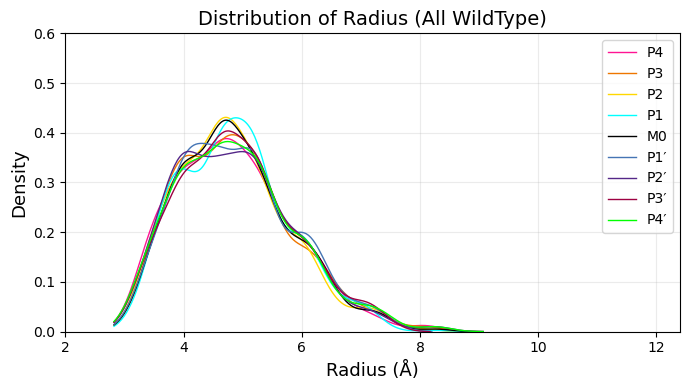

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gaussian_kde

# 改這可以選位子-------------------------------------------------
positions_to_plot = ["P4","P3","P2","P1","M0","P1′","P2′","P3′","P4′"]
pos_labels_all   = ["P4","P3","P2","P1","M0","P1′","P2′","P3′","P4′"]
# positions_to_plot = ["M0"]

idx_map          = {lbl:i for i,lbl in enumerate(pos_labels_all)}
idx_to_plot      = [idx_map[lbl] for lbl in positions_to_plot]

# 2️⃣ 把 radius_avg 攤平成 dict
#    radius_avg.shape == (n_mut, 9)
samples_dict = {
    lbl: radius_wt_avg[:, idx]
    for lbl, idx in zip(positions_to_plot, idx_to_plot)
}

# 3️⃣ 準備合併 triplets 2–9 的 traj
#    radius_traj.shape == (n_samples, 9)
combined_vals = gpo_radius_traj[:, 7].ravel()  # 取出索引 1–8 (即 triplet 2–9)

# 4️⃣ 開圖
fig, ax = plt.subplots(figsize=(7, 4))


colors = ["#ff1493", "#ee7600", "#ffd700", "#00ffff",
          "#000000", "#4575b4", "#542788", "#9e0142", "#00ff00"]
# colors = ["#ff1493", "#ee7600", "#ffd700", "#00ffff",
# colors =  ["#ffd700", "#00ffff", "#000000"]
for lbl, color in zip(positions_to_plot, colors):
    vals = samples_dict[lbl]
    kde = gaussian_kde(vals)
    xs  = np.linspace(vals.min()*0.9, vals.max()*1.1, 300)
    ys  = kde(xs)
    ax.plot(xs, ys, color=color, lw=1, label=lbl)

# 疊上 combined triplet 2–9 的 KDE
kde_c = gaussian_kde(combined_vals, bw_method=0.7)
xs_c  = np.linspace(combined_vals.min()*0.9,
                    combined_vals.max()*1.1, 300)
ys_c  = kde_c(xs_c)
# ax.plot(xs_c, ys_c, color="purple", lw=1, label="gpo")
# ax.fill_between(xs_c, ys_c, linestyle='--', color="purple", alpha=0.2)
# --- 在画完合并 KDE 之后，紧接着加：
# 计算峰值位置
peak_idx = np.argmax(ys_c)
peak_x   = xs_c[peak_idx]


# 画一条竖线
# ax.axvline(peak_x, color="purple", linestyle="--", linewidth=1)

peak_idx = np.argmax(ys_c)
peak_x   = xs_c[peak_idx]

# 设定 Y 轴上限
ax.set_ylim(0, 0.45)

# 画垂直线 & 标注峰值 X
# ax.axvline(peak_x, color="purple", linestyle="--", linewidth=1)

# 把文字放在 Y 轴顶端（0.45）稍微偏下，不超出图框
# ax.text(peak_x, 0.932,        # 固定在 0.42 < 0.45
#         f"{peak_x:.2f} Å", 
#         color="purple", 
#         ha="center", va="bottom",
#         fontsize=10,
#         backgroundcolor="white")

# 格式化
ax.set_xlabel("Radius (Å)", fontsize=13)
ax.set_ylabel("Density",    fontsize=13)
ax.set_xlim(2, 12.4)
ax.set_ylim(0, 0.6)
ax.set_title("Distribution of Radius (All WildType)", fontsize=14)
ax.grid(True, alpha=0.25)
ax.legend(fontsize=10, ncol=1, loc="upper right")

plt.tight_layout()
plt.show()


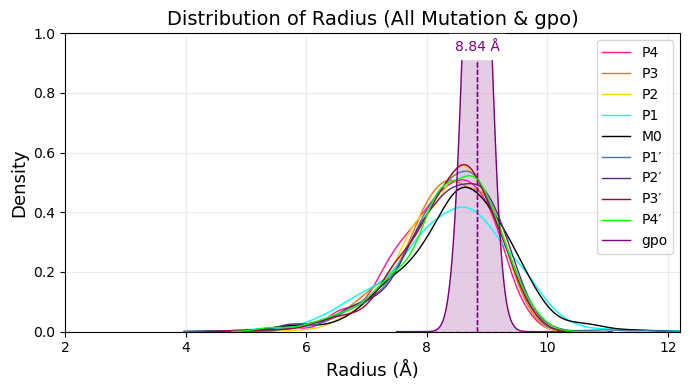

In [89]:
# -------------------------------------------------
# 1️⃣ 定義要畫的那些位置
positions_to_plot = ["P4","P3","P2","P1","M0","P1′","P2′","P3′","P4′"]
pos_labels_all   = ["P4","P3","P2","P1","M0","P1′","P2′","P3′","P4′"]
idx_map          = {lbl:i for i,lbl in enumerate(pos_labels_all)}
idx_to_plot      = [idx_map[lbl] for lbl in positions_to_plot]

# 2️⃣ 把 radius_avg 攤平成 dict
#    radius_avg.shape == (n_mut, 9)
samples_dict = {
    lbl: unit_hei_avg[:, idx]
    for lbl, idx in zip(positions_to_plot, idx_to_plot)
}

# 3️⃣ 準備合併 triplets 2–9 的 traj
#    radius_traj.shape == (n_samples, 9)
combined_vals = gpo_unit_hei_traj[:, 1:].ravel()  # 取出索引 1–8 (即 triplet 2–9)

# 4️⃣ 開圖
fig, ax = plt.subplots(figsize=(7, 4))

# 5️⃣ 畫各 position 的 KDE
colors = ["#ff1493", "#ee7600", "#ffd700", "#00ffff",
          "#000000", "#4575b4", "#542788", "#9e0142", "#00ff00"]

for lbl, color in zip(positions_to_plot, colors):
    vals = samples_dict[lbl]
    kde = gaussian_kde(vals)
    xs  = np.linspace(vals.min()*0.9, vals.max()*1.1, 300)
    ys  = kde(xs)
    ax.plot(xs, ys, color=color, lw=1, label=lbl)

# 疊上 combined triplet 2–9 的 KDE
kde_c = gaussian_kde(combined_vals, bw_method=0.7)
xs_c  = np.linspace(combined_vals.min()*0.9,
                    combined_vals.max()*1.1, 300)
ys_c  = kde_c(xs_c)
ax.plot(xs_c, ys_c, color="purple", lw=1, label="gpo")
ax.fill_between(xs_c, ys_c, linestyle='--', color="purple", alpha=0.2)
# --- 在画完合并 KDE 之后，紧接着加：
# 计算峰值位置
peak_idx = np.argmax(ys_c)
peak_x   = xs_c[peak_idx]


# 画一条竖线
ax.axvline(peak_x, color="purple", linestyle="--", linewidth=1)

peak_idx = np.argmax(ys_c)
peak_x   = xs_c[peak_idx]

# 设定 Y 轴上限
ax.set_ylim(0, 0.6)

# 画垂直线 & 标注峰值 X
ax.axvline(peak_x, color="purple", linestyle="--", linewidth=1)

# 把文字放在 Y 轴顶端（0.45）稍微偏下，不超出图框
ax.text(peak_x, 0.932,        # 固定在 0.42 < 0.45
        f"{peak_x:.2f} Å", 
        color="purple", 
        ha="center", va="bottom",
        fontsize=10,
        backgroundcolor="white")

# 格式化
ax.set_xlabel("Radius (Å)", fontsize=13)
ax.set_ylabel("Density",    fontsize=13)
ax.set_xlim(2, 12.2)
ax.set_ylim(0, 1)
ax.set_title("Distribution of Radius (All Mutation & gpo)", fontsize=14)
ax.grid(True, alpha=0.25)
ax.legend(fontsize=10, ncol=1, loc="upper right")

plt.tight_layout()
plt.show()


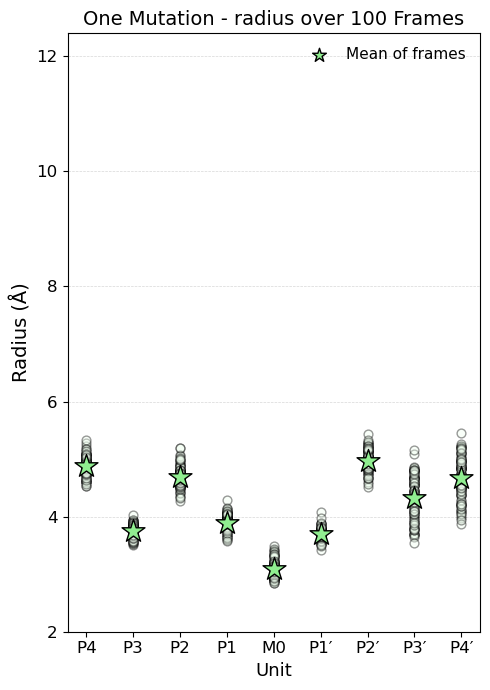

In [150]:
import numpy as np
import matplotlib.pyplot as plt

# ---------- 0. 找出 105_CYS_1 的索引 ----------
mask = (
    (triplet_number_arr == 105) &          # triplet 105
    (mutation_name_arr.astype(str) == "CYS") &
    (alpha12_arr == 1)                     # α1
)
idx_list = np.where(mask)[0]
if idx_list.size == 0:
    raise ValueError("找不到 105_CYS_1 這筆資料")
idx = idx_list[0]                          # 取得唯一索引

# ---------- 1. 取出 radius (100, 9) ----------
rad_block = radius_all[idx]                # shape (100, 9)
rad_avg   = rad_block.mean(axis=0)         # (9,) 每位置平均

# ---------- 2. 畫圖 ----------
pos = np.arange(9) + 1
labels = ["P4","P3","P2","P1","M0","P1′","P2′","P3′","P4′"]

plt.figure(figsize=(5, 7))

# 2-1 100 個 frame 點
for frame in range(rad_block.shape[0]):
    plt.scatter(pos,
                rad_block[frame],          # 9 個位置
                color='honeydew',
                edgecolor='black',
                s=40, alpha=0.4, zorder=2)

# 2-2 位置平均值（藍色星星）
plt.scatter(pos, rad_avg,
            marker='*', color='lightgreen',
            edgecolor='black', s=300, zorder=4,
            label='Mean of frames')

# ---------- 3. 美化 ----------
plt.xticks(pos, labels, fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel("Radius (Å)", fontsize=14)
plt.xlabel("Unit", fontsize=13)
plt.ylim(2, 12.4)
# 先組出突變代號字串
mut_id = f"{triplet_number_arr[idx]}_{mutation_name_arr[idx]}_{alpha12_arr[idx]}"  # 105_CYS_1
# plt.title(f"{mut_id} – Radius over 100 frames", fontsize=14)
plt.title(f"One Mutation - radius over 100 Frames", fontsize=14)
plt.grid(axis='y', linestyle='--', lw=0.5, alpha=.5)
plt.legend(frameon=False, markerscale=0.6, fontsize=11)
plt.tight_layout()
plt.show()



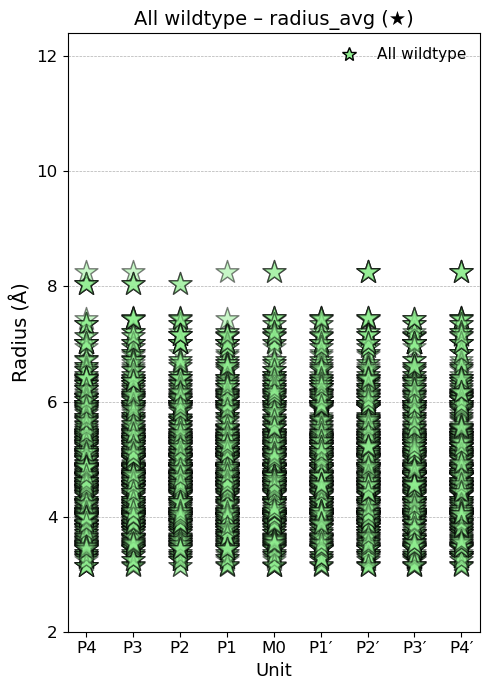

In [179]:
from matplotlib.lines import Line2D
plt.figure(figsize=(5, 7))

# ── 2. All Mutation ──
for i in range(radius_wt_avg.shape[0]):
    plt.scatter(np.arange(9) + 1,
                radius_wt_avg[i, :],
                marker='*',
                color='lightgreen',
                edgecolor='black',
                s=300,
                alpha=0.5,      # 可視需要調透明度
                zorder=3)

# ---------- 0. 找出 105_CYS_1 的索引 ----------
mask = (         # triplet 105
    (mutation_name_arr.astype(str) == "CYS") &
    (alpha12_arr == 1)                     # α1
)
idx_list = np.where(mask)[0]

for i in range(len(idx_list)):
    # ---------- 1. 取出 radius (100, 9) ----------
    rad_block = radius_all[idx_list[i]]                # shape (100, 9)
    rad_avg   = rad_block.mean(axis=0)         # (9,) 每位置平均

    # ---------- 2. 畫圖 ----------
    pos = np.arange(9) + 1
    labels = ["P4","P3","P2","P1","M0","P1′","P2′","P3′","P4′"]


    # 2-2 cys
    # plt.scatter(pos, rad_avg,
    #             marker='*', color='orange',
    #             edgecolor='black', s=300, zorder=4,
    #             alpha=0.7,
    #             label='a1_Cys')

h_all = Line2D([], [], marker='*', linestyle='None',
               markerfacecolor='lightgreen', markeredgecolor='black',
               markersize=10, label='All wildtype')
# h_sel = Line2D([], [], marker='*', linestyle='None',
#                markerfacecolor='orange', markeredgecolor='black',
#                markersize=10, label='α1-Cys mean')

plt.legend(handles=[h_all],
           frameon=False, loc='upper right', fontsize=11)

# ── 3. 軸標籤 & 標題一次設定即可 ──
xlabel = ["P4", "P3", "P2", "P1", "M0", "P1′", "P2′", "P3′", "P4′"]
plt.xticks(np.arange(9) + 1, xlabel, fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel("Radius (Å)", fontsize=14)
plt.ylim(2, 12.4)
plt.xlabel("Unit", fontsize=13)
plt.title("All wildtype – radius_avg (★)", fontsize=14)
# plt.title("α1-Cys mutants – radius_avg (★)", fontsize=14)
plt.grid(True, axis='y', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()


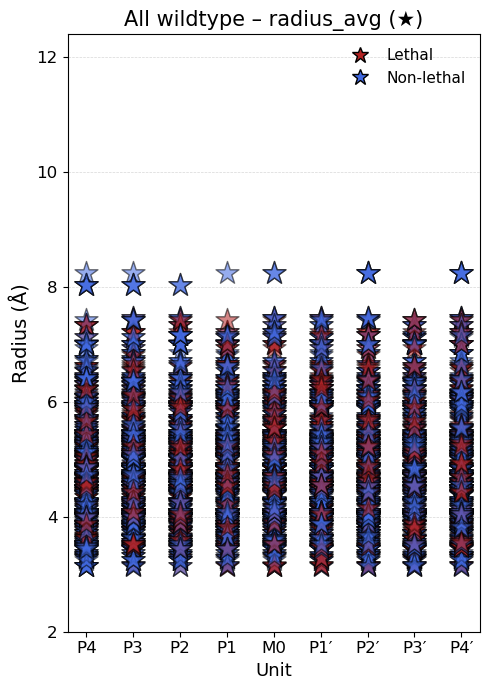

In [178]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

plt.figure(figsize=(5, 7))

# ── 1. 依致死性畫所有突變 ────────────────────────────────
for i in range(radius_wt_avg.shape[0]):
    col = 'firebrick' if lethal_arr[i] == 0 else 'royalblue'   # 0=L  1=N
    plt.scatter(np.arange(9) + 1,
                radius_wt_avg[i],
                marker='*', color=col,
                edgecolor='black', s=300,
                alpha=0.55, zorder=3)

# ── 2. legend proxy ───────────────────────────────────────
h_L = Line2D([], [], marker='*', linestyle='None',
             markerfacecolor='firebrick', markeredgecolor='black',
             markersize=12, label='Lethal')
h_N = Line2D([], [], marker='*', linestyle='None',
             markerfacecolor='royalblue', markeredgecolor='black',
             markersize=12, label='Non-lethal')
plt.legend(handles=[h_L, h_N], frameon=False,
           loc='upper right', fontsize=11)

# ── 3. 軸標籤 / 標題 / 版面 ──────────────────────────────
labels = ["P4","P3","P2","P1","M0","P1′","P2′","P3′","P4′"]
plt.xticks(np.arange(9) + 1, labels, fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Unit", fontsize=13)
plt.ylabel("Radius (Å)", fontsize=14)
plt.ylim(2, 12.4)
plt.title("All wildtype – radius_avg (★)", fontsize=15)
plt.grid(axis='y', linestyle='--', lw=0.5, alpha=.5)
plt.tight_layout()
plt.show()


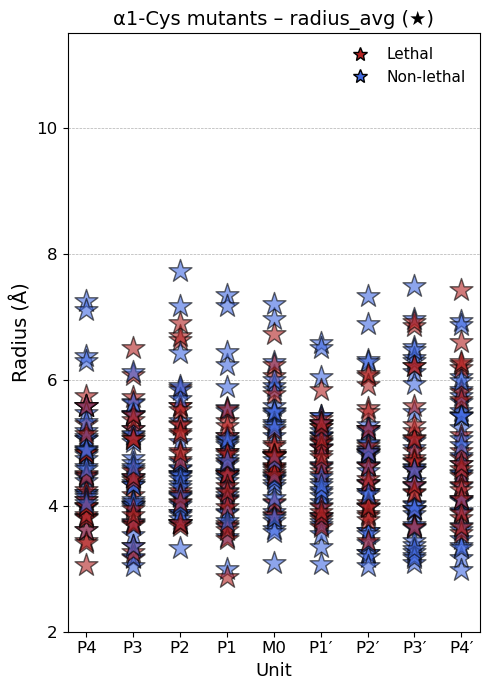

In [109]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# ── 1. 篩 α1-Cys ────────────────────────────────────────────
mask_cysa1 = (
    (mutation_name_arr.astype(str) == "CYS") &
    (alpha12_arr == 1)
)
idx_all = np.where(mask_cysa1)[0]          # 所有符合的索引

# ── 2. 畫圖 ───────────────────────────────────────────────────
plt.figure(figsize=(5, 7))

for idx in idx_all:
    col = 'firebrick' if lethal_arr[idx] == 0 else 'royalblue'   # L / N
    plt.scatter(np.arange(9) + 1,
                radius_avg[idx],        # (9,) ← 已是 100 frame 平均
                marker='*', color=col,
                edgecolor='black', s=300,
                 alpha=0.6, zorder=3)

# ── 3. Legend (代理符號) ─────────────────────────────────────
h_L = Line2D([], [], marker='*', linestyle='None',
             markerfacecolor='firebrick', markeredgecolor='black',
             markersize=10, label='Lethal')
h_N = Line2D([], [], marker='*', linestyle='None',
             markerfacecolor='royalblue', markeredgecolor='black',
             markersize=10, label='Non-lethal')
plt.legend(handles=[h_L, h_N], frameon=False,
           loc='upper right', fontsize=11)

# ── 4. 軸 & 標題 ─────────────────────────────────────────────
labels = ["P4","P3","P2","P1","M0","P1′","P2′","P3′","P4′"]
plt.xticks(np.arange(9)+1, labels, fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel("Radius (Å)", fontsize=14)
plt.ylim(2, 11.5)
plt.xlabel("Unit", fontsize=13)
plt.title("α1-Cys mutants – radius_avg (★)", fontsize=14)
plt.grid(True, axis='y', linestyle='--', lw=0.5)
plt.tight_layout()
plt.show()


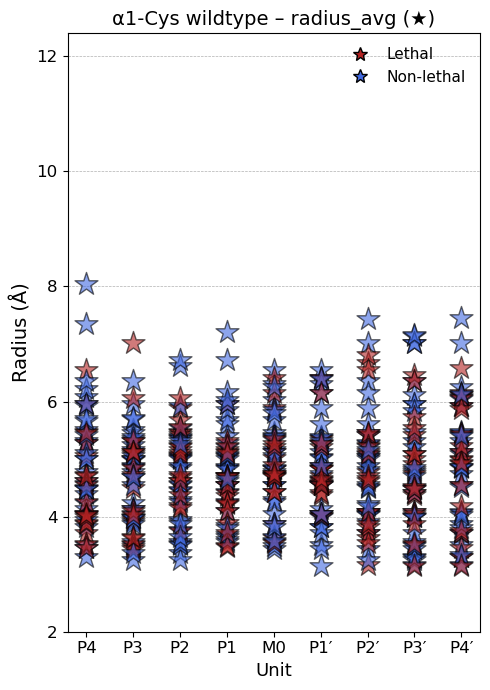

In [173]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# ── 1. 篩 α1-Cys ────────────────────────────────────────────
mask_cysa1 = (
    (mutation_name_arr.astype(str) == "CYS") &
    (alpha12_arr == 1)
)
idx_all = np.where(mask_cysa1)[0]          # 所有符合的索引

# ── 2. 畫圖 ───────────────────────────────────────────────────
plt.figure(figsize=(5, 7))

for idx in idx_all:
    col = 'firebrick' if lethal_arr[idx] == 0 else 'royalblue'   # L / N
    plt.scatter(np.arange(9) + 1,
                radius_wt_avg[idx],        # (9,) ← 已是 100 frame 平均
                marker='*', color=col,
                edgecolor='black', s=300, alpha=0.6, zorder=3)

# ── 3. Legend (代理符號) ─────────────────────────────────────
h_L = Line2D([], [], marker='*', linestyle='None',
             markerfacecolor='firebrick', markeredgecolor='black',
             markersize=10, label='Lethal')
h_N = Line2D([], [], marker='*', linestyle='None',
             markerfacecolor='royalblue', markeredgecolor='black',
             markersize=10, label='Non-lethal')
plt.legend(handles=[h_L, h_N], frameon=False,
           loc='upper right', fontsize=11)

# ── 4. 軸 & 標題 ─────────────────────────────────────────────
labels = ["P4","P3","P2","P1","M0","P1′","P2′","P3′","P4′"]
plt.xticks(np.arange(9)+1, labels, fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel("Radius (Å)", fontsize=14)
plt.ylim(2, 12.4)
plt.xlabel("Unit", fontsize=13)
plt.title("α1-Cys wildtype – radius_avg (★)", fontsize=14)
plt.grid(True, axis='y', linestyle='--', lw=0.5)
plt.tight_layout()
plt.show()


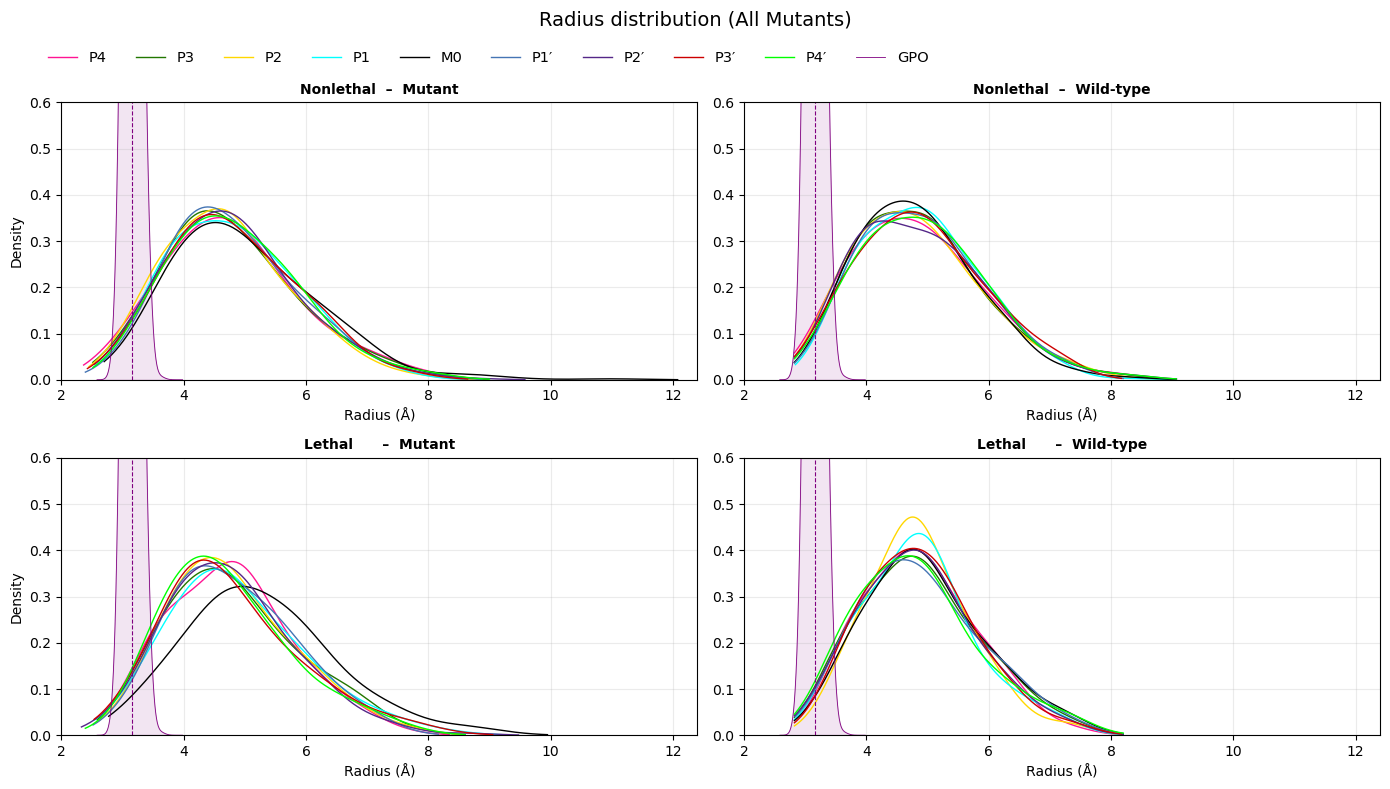

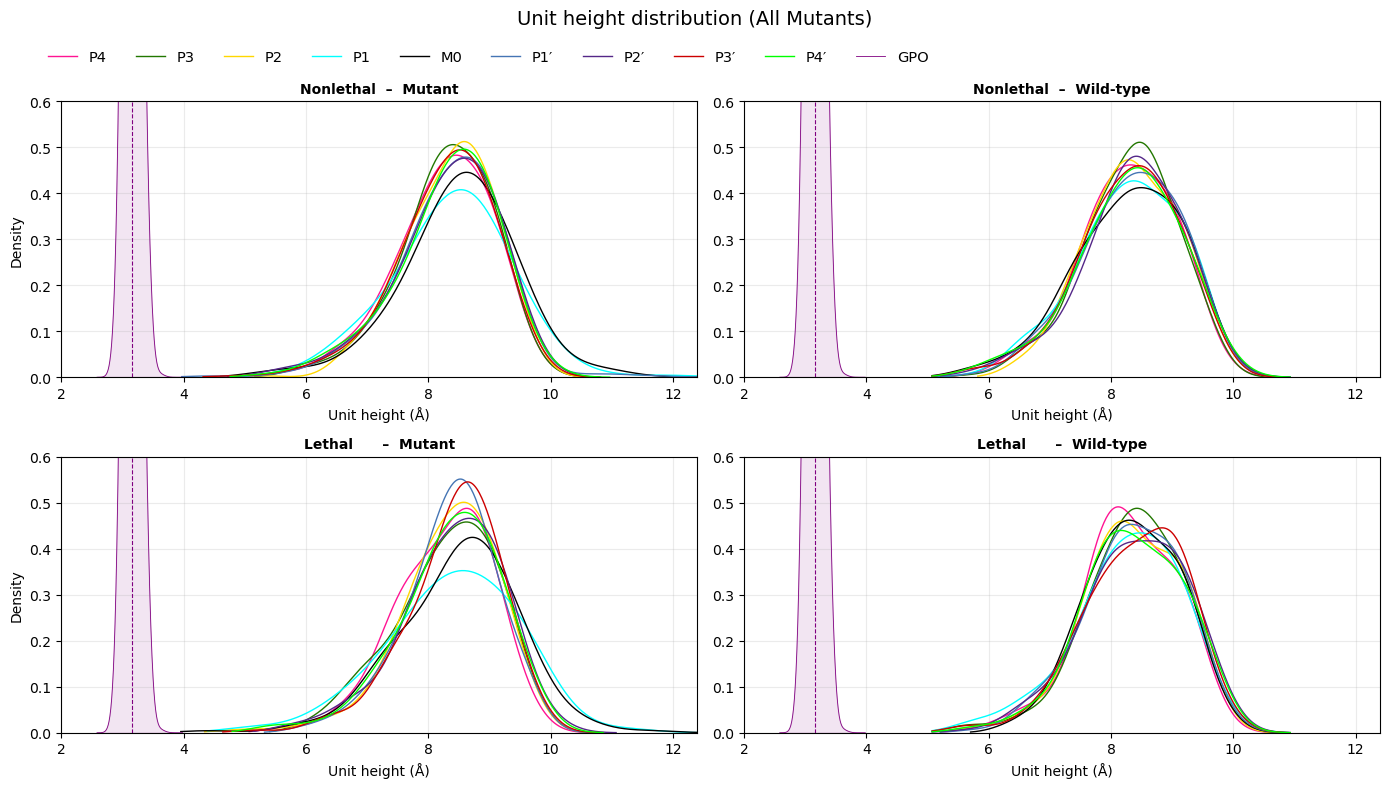

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# ─── 共用設定 ────────────────────────────────────────────────
POS = ["P4","P3","P2","P1","M0","P1′","P2′","P3′","P4′"]
COL = ["#ff1493","#227700","#ffd700","#00ffff",
       "#000000","#4575b4","#542788","#cc0000","#00ff00"]

# GPO 參考曲線（triplet 2–9）
comb      = gpo_radius_traj[:,1:].ravel()
xs_gpo    = np.linspace(comb.min()*0.9, comb.max()*1.1, 300)
ys_gpo    = gaussian_kde(comb, bw_method=0.7)(xs_gpo)
peak_gpo  = xs_gpo[np.argmax(ys_gpo)]

def _ax_kde(ax, samples, subtitle, xlabel,
            xlim=(2,12.4), ylim=(0,0.6)):
    """單一子圖：9 條 KDE + GPO"""
    if samples.shape[0] == 0:
        ax.set_visible(False); return

    for i, lab in enumerate(POS):
        kde = gaussian_kde(samples[:, i], bw_method=0.45)
        xs  = np.linspace(samples[:, i].min()*0.9,
                          samples[:, i].max()*1.1, 300)
        ax.plot(xs, kde(xs), color=COL[i], lw=1, label=lab)

    ax.plot(xs_gpo, ys_gpo, color="purple", lw=.6, label="GPO")
    ax.fill_between(xs_gpo, ys_gpo, color="purple", alpha=.1)
    ax.axvline(peak_gpo, color="purple", ls="--", lw=.8)

    ax.set_title(subtitle, fontweight="bold", fontsize=10)
    ax.set_xlabel(xlabel)
    ax.set_xlim(*xlim); ax.set_ylim(*ylim)
    ax.grid(alpha=.25)

def plot_kde_mut_vs_wt(mut_avg, wt_avg, lethal_arr,
                       metric="Radius", unit="Å"):
    """四宮格：列＝致死性，行＝Mut / WT"""
    nl = lethal_arr == 1     # Non-lethal mask
    le = lethal_arr == 0     #   Lethal mask

    fig, axes = plt.subplots(2, 2, figsize=(14, 8))
    (ax_mut_nl, ax_wt_nl), (ax_mut_le, ax_wt_le) = axes

    _ax_kde(ax_mut_nl, mut_avg[nl], "Nonlethal  –  Mutant",
            f"{metric} ({unit})")
    _ax_kde(ax_wt_nl , wt_avg [nl], "Nonlethal  –  Wild-type",
            f"{metric} ({unit})")
    _ax_kde(ax_mut_le, mut_avg[le], "Lethal      –  Mutant",
            f"{metric} ({unit})")
    _ax_kde(ax_wt_le , wt_avg [le], "Lethal      –  Wild-type",
            f"{metric} ({unit})")

    # y-label 置左列
    ax_mut_nl.set_ylabel("Density")
    ax_mut_le.set_ylabel("Density")

    # 共用圖例（取左上軸）
    h,l = ax_mut_nl.get_legend_handles_labels()
    fig.legend(h, l, ncol=10, loc=(0.03, 0.91),
               frameon=False, fontsize=10.5)

    fig.suptitle(f"{metric} distribution (All Mutants)",
                 fontsize=14)
    plt.tight_layout(rect=[0,0,1,0.95])
    plt.show()

# ─── 呼叫：Radius ───────────────────────────────────────────
plot_kde_mut_vs_wt(radius_avg,       # 突變  (587,9)
                   radius_wt_avg,    # 野生型 (587,9)
                   lethal_arr,
                   metric="Radius")

# ─── 若要再畫 Unit height，只要換資料再呼叫一次 ───────────────
plot_kde_mut_vs_wt(unit_hei_avg,     # 突變
                   unit_wt_avg,      # 野生型
                   lethal_arr,
                   metric="Unit height")


## CYS_head_teo

### head rad CYS

In [159]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
import os

# ------------------------- 共用設定 -------------------------
POS_LABS = ["P4","P3","P2","P1","M0","P1′","P2′","P3′","P4′"]
COLORS   = ["#ff1493","#227700","#ffd700","#00ffff",
            "#000000","#4575b4","#542788","#cc0000","#00ff00"]

# ── GPO 參考 KDE (triplet 2–9) ────────────────────────────
combined  = gpo_radius_traj[:, 1:].ravel()
xs_gpo    = np.linspace(combined.min()*0.9, combined.max()*1.1, 300)
ys_gpo    = gaussian_kde(combined, bw_method=0.7)(xs_gpo)
peak_gpo  = xs_gpo[np.argmax(ys_gpo)]

# --------------------- 主繪圖函式 --------------------------
def plot_kde_onepos_wt_vs_mut(data_mut, data_wt, meta,
                              pos_label="M0", t_title="Radius",
                              save_path=None):
    """
    只保留 triplet 1–50 且 α1 鏈 (alpha12==1)，
    再拆成 lethal / non-lethal → Mut / WT 四條 KDE。
    如果 save_path 為 None 會顯示；否則直接存檔並關閉圖。
    """
    # 位置索引
    idx = POS_LABS.index(pos_label)

    # 轉 ndarray
    lethal  = np.asarray(meta["lethal_arr"])
    alpha12 = np.asarray(meta["alpha12_arr"])
    tripnum = np.asarray(meta["triplet_number"])
    mutname = np.asarray(meta["mutation_name_arr"], dtype=str)

    mask_sel = (tripnum >= 1) & (tripnum <= 50) & (alpha12 == 1) & (mutname == "CYS")

    mut_sel  = data_mut[mask_sel]
    wt_sel   = data_wt[mask_sel]
    leth_sel = lethal  [mask_sel]

    m_L = leth_sel == 0   # lethal
    m_N = leth_sel == 1   # non-lethal

    samples = dict(
        WT_L  = wt_sel [m_L, idx],
        WT_N  = wt_sel [m_N, idx],
        MUT_L = mut_sel[m_L, idx],
        MUT_N = mut_sel[m_N, idx],
    )

    # 若沒有任何樣本就退出
    if all(v.size == 0 for v in samples.values()):
        print(f"No data for {pos_label}")
        return

    all_vals = np.concatenate([v for v in samples.values() if v.size])
    xs = np.linspace(all_vals.min()*0.9, all_vals.max()*1.1, 400)

    plt.figure(figsize=(8, 3))

    style = dict(
        WT_L  = dict(color='tomato',      ls='--', lw=1, label='WT-Lethal'),
        WT_N  = dict(color='deepskyblue', ls='--', lw=1, label='WT-Nonlethal'),
        MUT_L = dict(color='#d62728',     lw=1,   label='Mut-Lethal'),
        MUT_N = dict(color='royalblue',   lw=1,   label='Mut-Nonlethal'),
    )
    for key, vals in samples.items():
        if vals.size == 0:
            continue
        kde = gaussian_kde(vals, bw_method=0.45)
        plt.plot(xs, kde(xs), **style[key])

    # 疊 GPO
    plt.plot(xs_gpo, ys_gpo, color='purple', lw=.6, label='GPO')
    plt.fill_between(xs_gpo, ys_gpo, color='purple', alpha=.1)
    plt.axvline(peak_gpo, color='purple', ls='--', lw=.8)
    plt.text(peak_gpo, 1.8, f"{peak_gpo:.2f} Å",
             color="purple", ha="center", va="bottom", fontsize=10)

    plt.xlabel(f"{t_title} (Å)", fontsize=13)
    plt.ylabel("Density",        fontsize=13)
    plt.xlim(2, 12.4)
    plt.ylim(0, 1.8)
    plt.title(f"{pos_label}  (triplet 1-50, α1)", fontsize=14)
    plt.legend(fontsize=9)
    plt.grid(alpha=.25)
    plt.tight_layout()

    # ---- 存檔或顯示 ----
    if save_path is None:
        plt.show()
    else:
        plt.savefig(save_path, dpi=300, bbox_inches="tight")
        plt.close()
        print(f"Saved → {save_path}")

# ------------------------ 呼叫範例 --------------------------
meta = {
    "lethal_arr":     lethal_arr,
    "alpha12_arr":    alpha12_arr,
    "triplet_number": triplet_number_arr,
    "mutation_name_arr": mutation_name_arr
}

out_dir = "D:/collagen/figures/1-50"
os.makedirs(out_dir, exist_ok=True)

for lbl in POS_LABS:
    png = os.path.join(out_dir, f"radius_CYS_{lbl}.png")
    plot_kde_onepos_wt_vs_mut(radius_avg, radius_wt_avg,
                              meta, pos_label=lbl,
                              t_title="Radius",
                              save_path=png)   # ← 不顯示、直接存檔


Saved → D:/collagen/figures/1-50\radius_CYS_P4.png
Saved → D:/collagen/figures/1-50\radius_CYS_P3.png
Saved → D:/collagen/figures/1-50\radius_CYS_P2.png
Saved → D:/collagen/figures/1-50\radius_CYS_P1.png
Saved → D:/collagen/figures/1-50\radius_CYS_M0.png
Saved → D:/collagen/figures/1-50\radius_CYS_P1′.png
Saved → D:/collagen/figures/1-50\radius_CYS_P2′.png
Saved → D:/collagen/figures/1-50\radius_CYS_P3′.png
Saved → D:/collagen/figures/1-50\radius_CYS_P4′.png


### teo rad CYS

In [157]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
import os

# ------------------------- 共用設定 -------------------------
POS_LABS = ["P4","P3","P2","P1","M0","P1′","P2′","P3′","P4′"]
COLORS   = ["#ff1493","#227700","#ffd700","#00ffff",
            "#000000","#4575b4","#542788","#cc0000","#00ff00"]

# ── GPO 參考 KDE (triplet 2–9) ────────────────────────────
combined  = gpo_radius_traj[:, 1:].ravel()
xs_gpo    = np.linspace(combined.min()*0.9, combined.max()*1.1, 300)
ys_gpo    = gaussian_kde(combined, bw_method=0.7)(xs_gpo)
peak_gpo  = xs_gpo[np.argmax(ys_gpo)]

# --------------------- 主繪圖函式 --------------------------
def plot_kde_onepos_wt_vs_mut(data_mut, data_wt, meta,
                              pos_label="M0", t_title="Radius",
                              save_path=None):
    """
    只保留 triplet 1–50 且 α1 鏈 (alpha12==1)，
    再拆成 lethal / non-lethal → Mut / WT 四條 KDE。
    如果 save_path 為 None 會顯示；否則直接存檔並關閉圖。
    """
    # 位置索引
    idx = POS_LABS.index(pos_label)

    # 轉 ndarray
    lethal  = np.asarray(meta["lethal_arr"])
    alpha12 = np.asarray(meta["alpha12_arr"])
    tripnum = np.asarray(meta["triplet_number"])
    mutname = np.asarray(meta["mutation_name_arr"], dtype=str)

    mask_sel = (tripnum >= 300) & (tripnum <= 350) & (alpha12 == 1) & (mutname == "CYS")

    mut_sel  = data_mut[mask_sel]
    wt_sel   = data_wt[mask_sel]
    leth_sel = lethal  [mask_sel]

    m_L = leth_sel == 0   # lethal
    m_N = leth_sel == 1   # non-lethal

    samples = dict(
        WT_L  = wt_sel [m_L, idx],
        WT_N  = wt_sel [m_N, idx],
        MUT_L = mut_sel[m_L, idx],
        MUT_N = mut_sel[m_N, idx],
    )

    # 若沒有任何樣本就退出
    if all(v.size == 0 for v in samples.values()):
        print(f"No data for {pos_label}")
        return

    all_vals = np.concatenate([v for v in samples.values() if v.size])
    xs = np.linspace(all_vals.min()*0.9, all_vals.max()*1.1, 400)

    plt.figure(figsize=(8, 3))

    style = dict(
        WT_L  = dict(color='tomato',      ls='--', lw=1, label='WT-Lethal'),
        WT_N  = dict(color='deepskyblue', ls='--', lw=1, label='WT-Nonlethal'),
        MUT_L = dict(color='#d62728',     lw=1,   label='Mut-Lethal'),
        MUT_N = dict(color='royalblue',   lw=1,   label='Mut-Nonlethal'),
    )
    for key, vals in samples.items():
        if vals.size == 0:
            continue
        kde = gaussian_kde(vals, bw_method=0.35)
        plt.plot(xs, kde(xs), **style[key])

    # 疊 GPO
    plt.plot(xs_gpo, ys_gpo, color='purple', lw=.6, label='GPO')
    plt.fill_between(xs_gpo, ys_gpo, color='purple', alpha=.1)
    plt.axvline(peak_gpo, color='purple', ls='--', lw=.8)
    plt.text(peak_gpo, 1.8, f"{peak_gpo:.2f} Å",
             color="purple", ha="center", va="bottom", fontsize=10)

    plt.xlabel(f"{t_title} (Å)", fontsize=13)
    plt.ylabel("Density",        fontsize=13)
    plt.xlim(2, 12.4)
    plt.ylim(0, 1.8)
    plt.title(f"{pos_label}  (triplet 300-350, α1)", fontsize=14)
    plt.legend(fontsize=9)
    plt.grid(alpha=.25)
    plt.tight_layout()

    # ---- 存檔或顯示 ----
    if save_path is None:
        plt.show()
    else:
        plt.savefig(save_path, dpi=300, bbox_inches="tight")
        plt.close()
        print(f"Saved → {save_path}")

# ------------------------ 呼叫範例 --------------------------
meta = {
    "lethal_arr":     lethal_arr,
    "alpha12_arr":    alpha12_arr,
    "triplet_number": triplet_number_arr,
    "mutation_name_arr": mutation_name_arr
}

out_dir = "D:/collagen/figures/300-350"
os.makedirs(out_dir, exist_ok=True)

for lbl in POS_LABS:
    png = os.path.join(out_dir, f"radius_CYS_{lbl}.png")
    plot_kde_onepos_wt_vs_mut(radius_avg, radius_wt_avg,
                              meta, pos_label=lbl,
                              t_title="Radius",
                              save_path=png)   # ← 不顯示、直接存檔


Saved → D:/collagen/figures/300-350\radius_CYS_P4.png
Saved → D:/collagen/figures/300-350\radius_CYS_P3.png
Saved → D:/collagen/figures/300-350\radius_CYS_P2.png
Saved → D:/collagen/figures/300-350\radius_CYS_P1.png
Saved → D:/collagen/figures/300-350\radius_CYS_M0.png
Saved → D:/collagen/figures/300-350\radius_CYS_P1′.png
Saved → D:/collagen/figures/300-350\radius_CYS_P2′.png
Saved → D:/collagen/figures/300-350\radius_CYS_P3′.png
Saved → D:/collagen/figures/300-350\radius_CYS_P4′.png


### head uh CYS

In [155]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
import os

# ------------------------- 共用設定 -------------------------
POS_LABS = ["P4","P3","P2","P1","M0","P1′","P2′","P3′","P4′"]
COLORS   = ["#ff1493","#227700","#ffd700","#00ffff",
            "#000000","#4575b4","#542788","#cc0000","#00ff00"]

# ── GPO 參考 KDE (triplet 2–9) ────────────────────────────
combined  = gpo_unit_hei_traj[:, 1:].ravel()
xs_gpo    = np.linspace(combined.min()*0.9, combined.max()*1.1, 300)
ys_gpo    = gaussian_kde(combined, bw_method=0.7)(xs_gpo)
peak_gpo  = xs_gpo[np.argmax(ys_gpo)]

# --------------------- 主繪圖函式 --------------------------
def plot_kde_onepos_wt_vs_mut(data_mut, data_wt, meta,
                              pos_label="M0", t_title="unit_hei",
                              save_path=None):
    """
    只保留 triplet 1–50 且 α1 鏈 (alpha12==1)，
    再拆成 lethal / non-lethal → Mut / WT 四條 KDE。
    如果 save_path 為 None 會顯示；否則直接存檔並關閉圖。
    """
    # 位置索引
    idx = POS_LABS.index(pos_label)

    # 轉 ndarray
    lethal  = np.asarray(meta["lethal_arr"])
    alpha12 = np.asarray(meta["alpha12_arr"])
    tripnum = np.asarray(meta["triplet_number"])
    mutname = np.asarray(meta["mutation_name_arr"], dtype=str)

    mask_sel = (tripnum >= 1) & (tripnum <= 50) & (alpha12 == 1) & (mutname == "CYS")

    mut_sel  = data_mut[mask_sel]
    wt_sel   = data_wt[mask_sel]
    leth_sel = lethal  [mask_sel]

    m_L = leth_sel == 0   # lethal
    m_N = leth_sel == 1   # non-lethal

    samples = dict(
        WT_L  = wt_sel [m_L, idx],
        WT_N  = wt_sel [m_N, idx],
        MUT_L = mut_sel[m_L, idx],
        MUT_N = mut_sel[m_N, idx],
    )

    # 若沒有任何樣本就退出
    if all(v.size == 0 for v in samples.values()):
        print(f"No data for {pos_label}")
        return

    all_vals = np.concatenate([v for v in samples.values() if v.size])
    xs = np.linspace(all_vals.min()*0.9, all_vals.max()*1.1, 400)

    plt.figure(figsize=(8, 3))

    style = dict(
        WT_L  = dict(color='tomato',      ls='--', lw=1, label='WT-Lethal'),
        WT_N  = dict(color='deepskyblue', ls='--', lw=1, label='WT-Nonlethal'),
        MUT_L = dict(color='#d62728',     lw=1,   label='Mut-Lethal'),
        MUT_N = dict(color='royalblue',   lw=1,   label='Mut-Nonlethal'),
    )
    for key, vals in samples.items():
        if vals.size == 0:
            continue
        kde = gaussian_kde(vals, bw_method=0.35)
        plt.plot(xs, kde(xs), **style[key])

    # 疊 GPO
    plt.plot(xs_gpo, ys_gpo, color='purple', lw=.6, label='GPO')
    plt.fill_between(xs_gpo, ys_gpo, color='purple', alpha=.1)
    plt.axvline(peak_gpo, color='purple', ls='--', lw=.8)
    plt.text(peak_gpo, 1.8, f"{peak_gpo:.2f} Å",
             color="purple", ha="center", va="bottom", fontsize=10
             )

    plt.xlabel(f"{t_title} (Å)", fontsize=13)
    plt.ylabel("Density",        fontsize=13)
    plt.xlim(2, 12.4)
    plt.ylim(0, 1.8)
    plt.title(f"{pos_label}  (triplet 1–50, α1)", fontsize=14)
    plt.legend(fontsize=9)
    plt.grid(alpha=.25)
    plt.tight_layout()

    # ---- 存檔或顯示 ----
    if save_path is None:
        plt.show()
    else:
        plt.savefig(save_path, dpi=300, bbox_inches="tight")
        plt.close()
        print(f"Saved → {save_path}")

# ------------------------ 呼叫範例 --------------------------
meta = {
    "lethal_arr":     lethal_arr,
    "alpha12_arr":    alpha12_arr,
    "triplet_number": triplet_number_arr,
    "mutation_name_arr": mutation_name_arr
}

out_dir = "D:/collagen/figures/1-50"
os.makedirs(out_dir, exist_ok=True)

for lbl in POS_LABS:
    png = os.path.join(out_dir, f"unit_hei_CYS_{lbl}.png")
    plot_kde_onepos_wt_vs_mut(unit_hei_avg, unit_wt_avg,
                              meta, pos_label=lbl,
                              t_title="unit_hei",
                              save_path=png)   # ← 不顯示、直接存檔


Saved → D:/collagen/figures/1-50\unit_hei_CYS_P4.png
Saved → D:/collagen/figures/1-50\unit_hei_CYS_P3.png
Saved → D:/collagen/figures/1-50\unit_hei_CYS_P2.png
Saved → D:/collagen/figures/1-50\unit_hei_CYS_P1.png
Saved → D:/collagen/figures/1-50\unit_hei_CYS_M0.png
Saved → D:/collagen/figures/1-50\unit_hei_CYS_P1′.png
Saved → D:/collagen/figures/1-50\unit_hei_CYS_P2′.png
Saved → D:/collagen/figures/1-50\unit_hei_CYS_P3′.png
Saved → D:/collagen/figures/1-50\unit_hei_CYS_P4′.png


### teo uh CYS

In [153]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
import os

# ------------------------- 共用設定 -------------------------
POS_LABS = ["P4","P3","P2","P1","M0","P1′","P2′","P3′","P4′"]
COLORS   = ["#ff1493","#227700","#ffd700","#00ffff",
            "#000000","#4575b4","#542788","#cc0000","#00ff00"]

# ── GPO 參考 KDE (triplet 2–9) ────────────────────────────
combined  = gpo_unit_hei_traj[:, 1:].ravel()
xs_gpo    = np.linspace(combined.min()*0.9, combined.max()*1.1, 300)
ys_gpo    = gaussian_kde(combined, bw_method=0.7)(xs_gpo)
peak_gpo  = xs_gpo[np.argmax(ys_gpo)]

# --------------------- 主繪圖函式 --------------------------
def plot_kde_onepos_wt_vs_mut(data_mut, data_wt, meta,
                              pos_label="M0", t_title="unit_hei",
                              save_path=None):
    """
    只保留 triplet 1–50 且 α1 鏈 (alpha12==1)，
    再拆成 lethal / non-lethal → Mut / WT 四條 KDE。
    如果 save_path 為 None 會顯示；否則直接存檔並關閉圖。
    """
    # 位置索引
    idx = POS_LABS.index(pos_label)

    # 轉 ndarray
    lethal  = np.asarray(meta["lethal_arr"])
    alpha12 = np.asarray(meta["alpha12_arr"])
    tripnum = np.asarray(meta["triplet_number"])
    mutname = np.asarray(meta["mutation_name_arr"], dtype=str)

    mask_sel = (tripnum >= 300) & (tripnum <= 350) & (alpha12 == 1) & (mutname == "CYS")

    mut_sel  = data_mut[mask_sel]
    wt_sel   = data_wt[mask_sel]
    leth_sel = lethal  [mask_sel]

    m_L = leth_sel == 0   # lethal
    m_N = leth_sel == 1   # non-lethal

    samples = dict(
        WT_L  = wt_sel [m_L, idx],
        WT_N  = wt_sel [m_N, idx],
        MUT_L = mut_sel[m_L, idx],
        MUT_N = mut_sel[m_N, idx],
    )

    # 若沒有任何樣本就退出
    if all(v.size == 0 for v in samples.values()):
        print(f"No data for {pos_label}")
        return

    all_vals = np.concatenate([v for v in samples.values() if v.size])
    xs = np.linspace(all_vals.min()*0.9, all_vals.max()*1.1, 400)

    plt.figure(figsize=(8, 3))

    style = dict(
        WT_L  = dict(color='tomato',      ls='--', lw=1, label='WT-Lethal'),
        WT_N  = dict(color='deepskyblue', ls='--', lw=1, label='WT-Nonlethal'),
        MUT_L = dict(color='#d62728',     lw=1,   label='Mut-Lethal'),
        MUT_N = dict(color='royalblue',   lw=1,   label='Mut-Nonlethal'),
    )
    for key, vals in samples.items():
        if vals.size == 0:
            continue
        kde = gaussian_kde(vals, bw_method=0.35)
        plt.plot(xs, kde(xs), **style[key])

    # 疊 GPO
    plt.plot(xs_gpo, ys_gpo, color='purple', lw=.6, label='GPO')
    plt.fill_between(xs_gpo, ys_gpo, color='purple', alpha=.1)
    plt.axvline(peak_gpo, color='purple', ls='--', lw=.8)
    plt.text(peak_gpo, 1.8, f"{peak_gpo:.2f} Å",
             color="purple", ha="center", va="bottom", fontsize=10)

    plt.xlabel(f"{t_title} (Å)", fontsize=13)
    plt.ylabel("Density",        fontsize=13)
    plt.xlim(2, 12.4)
    plt.ylim(0, 1.8)
    plt.title(f"{pos_label}  (triplet 300-350, α1)", fontsize=14)
    plt.legend(fontsize=9)
    plt.grid(alpha=.25)
    plt.tight_layout()

    # ---- 存檔或顯示 ----
    if save_path is None:
        plt.show()
    else:
        plt.savefig(save_path, dpi=300, bbox_inches="tight")
        plt.close()
        print(f"Saved → {save_path}")

# ------------------------ 呼叫範例 --------------------------
meta = {
    "lethal_arr":     lethal_arr,
    "alpha12_arr":    alpha12_arr,
    "triplet_number": triplet_number_arr,
    "mutation_name_arr": mutation_name_arr
}

out_dir = "D:/collagen/figures/300-350"
os.makedirs(out_dir, exist_ok=True)

for lbl in POS_LABS:
    png = os.path.join(out_dir, f"unit_hei_CYS_{lbl}.png")
    plot_kde_onepos_wt_vs_mut(unit_hei_avg, unit_wt_avg,
                              meta, pos_label=lbl,
                              t_title="unit_hei",
                              save_path=png)   # ← 不顯示、直接存檔


Saved → D:/collagen/figures/300-350\unit_hei_CYS_P4.png
Saved → D:/collagen/figures/300-350\unit_hei_CYS_P3.png
Saved → D:/collagen/figures/300-350\unit_hei_CYS_P2.png
Saved → D:/collagen/figures/300-350\unit_hei_CYS_P1.png
Saved → D:/collagen/figures/300-350\unit_hei_CYS_M0.png
Saved → D:/collagen/figures/300-350\unit_hei_CYS_P1′.png
Saved → D:/collagen/figures/300-350\unit_hei_CYS_P2′.png
Saved → D:/collagen/figures/300-350\unit_hei_CYS_P3′.png
Saved → D:/collagen/figures/300-350\unit_hei_CYS_P4′.png


### wt head rad/uh CYS

In [122]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
import os

POS_LABS = ["P4","P3","P2","P1","M0","P1′","P2′","P3′","P4′"]
COLORS   = ["#ff1493","#227700","#ffd700","#00ffff",
            "#000000","#4575b4","#542788","#cc0000","#00ff00"]

def plot_kde_9pos_wt(data_wt, meta,
                     t_title="Radius", unit="Å",
                     xlim=None, ylim=(0,1),
                     save_path=None):
    """WT 9-pos KDE；xlim 若為 None 則自動，否則用傳入範圍"""
    alpha12 = np.asarray(meta["alpha12_arr"])
    tripnum = np.asarray(meta["triplet_number"])
    mutname = np.asarray(meta["mutation_name_arr"], dtype=str)
    mask    = (tripnum >= 1) & (tripnum <= 50) & (alpha12 == 1) & (mutname == "CYS")
    wt_sel  = data_wt[mask]                      # (n, 9)
    if wt_sel.size == 0:
        print("No WT sample under the selected filter."); return

    plt.figure(figsize=(8, 4))
    for i, lab in enumerate(POS_LABS):
        vals = wt_sel[:, i]
        kde  = gaussian_kde(vals, bw_method=0.35)
        xs   = np.linspace(vals.min()*0.9, vals.max()*1.1, 300)
        plt.plot(xs, kde(xs), color=COLORS[i], lw=1, label=lab)

    plt.xlabel(f"{t_title} ({unit})", fontsize=13)
    plt.ylabel("Density",            fontsize=13)

    if xlim is None:
        xmin = min(wt_sel.min()*0.9,  2.0)
        xmax = max(wt_sel.max()*1.1, 10.0)
        plt.xlim(xmin, xmax)
    else:
        plt.xlim(*xlim)
    plt.ylim(*ylim)

    plt.title(f"{t_title} distribution – 9 positions\n"
              "(WT, triplet 1–50, α1)", fontsize=14)
    plt.legend(ncol=9, frameon=False, fontsize=9, loc="upper center")
    plt.grid(alpha=.25)
    plt.tight_layout()

    if save_path is None:
        plt.show()
    else:
        plt.savefig(save_path, dpi=300, bbox_inches="tight")
        plt.close()
        print(f"Saved → {save_path}")

# ----------------  呼叫 ----------------
meta = {"alpha12_arr": alpha12_arr,
        "triplet_number": triplet_number_arr,
        "mutation_name_arr": mutation_name_arr
        }

out_dir = "D:/collagen/figures/wt_head_teo/1-50"
os.makedirs(out_dir, exist_ok=True)

# Radius：想看 2.5–9.0 Å
plot_kde_9pos_wt(radius_wt_avg, meta,
                 t_title="Radius", unit="Å",
                 xlim=(2, 12.4),
                 save_path=os.path.join(out_dir, "radius_WT_CYS.png"))

# Unit height：想看 6–11 Å
plot_kde_9pos_wt(unit_wt_avg, meta,
                 t_title="Unit height", unit="Å",
                 xlim=(2, 12.4),
                 save_path=os.path.join(out_dir, "unithei_WT_CYS.png"))


Saved → D:/collagen/figures/wt_head_teo/1-50\radius_WT_CYS.png
Saved → D:/collagen/figures/wt_head_teo/1-50\unithei_WT_CYS.png


### wt teo rad/uh CYS

In [120]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
import os

POS_LABS = ["P4","P3","P2","P1","M0","P1′","P2′","P3′","P4′"]
COLORS   = ["#ff1493","#227700","#ffd700","#00ffff",
            "#000000","#4575b4","#542788","#cc0000","#00ff00"]

def plot_kde_9pos_wt(data_wt, meta,
                     t_title="Radius", unit="Å",
                     xlim=None, ylim=(0,1),
                     save_path=None):
    """WT 9-pos KDE；xlim 若為 None 則自動，否則用傳入範圍"""
    alpha12 = np.asarray(meta["alpha12_arr"])
    tripnum = np.asarray(meta["triplet_number"])
    mutname = np.asarray(meta["mutation_name_arr"], dtype=str)

    mask    = (tripnum >= 300) & (tripnum <= 350) & (alpha12 == 1)
    wt_sel  = data_wt[mask]                      # (n, 9)
    if wt_sel.size == 0:
        print("No WT sample under the selected filter."); return

    plt.figure(figsize=(8, 4))
    for i, lab in enumerate(POS_LABS):
        vals = wt_sel[:, i]
        kde  = gaussian_kde(vals, bw_method=0.35)
        xs   = np.linspace(vals.min()*0.9, vals.max()*1.1, 300)
        plt.plot(xs, kde(xs), color=COLORS[i], lw=1, label=lab)

    plt.xlabel(f"{t_title} ({unit})", fontsize=13)
    plt.ylabel("Density",            fontsize=13)

    if xlim is None:
        xmin = min(wt_sel.min()*0.9,  2.0)
        xmax = max(wt_sel.max()*1.1, 10.0)
        plt.xlim(xmin, xmax)
    else:
        plt.xlim(*xlim)
    plt.ylim(*ylim)

    plt.title(f"{t_title} distribution – 9 positions\n"
              "(WT, triplet 300-350, α1)", fontsize=14)
    plt.legend(ncol=9, frameon=False, fontsize=9, loc="upper center")
    plt.grid(alpha=.25)
    plt.tight_layout()

    if save_path is None:
        plt.show()
    else:
        plt.savefig(save_path, dpi=300, bbox_inches="tight")
        plt.close()
        print(f"Saved → {save_path}")

# ----------------  呼叫 ----------------
meta = {"alpha12_arr": alpha12_arr,
        "triplet_number": triplet_number_arr,
        "mutation_name_arr": mutation_name_arr }

out_dir = "D:/collagen/figures/wt_head_teo/300-350"
os.makedirs(out_dir, exist_ok=True)

# Radius：想看 2.5–9.0 Å
plot_kde_9pos_wt(radius_wt_avg, meta,
                 t_title="Radius", unit="Å",
                 xlim=(2, 12.4),
                 save_path=os.path.join(out_dir, "radius_WT.png"))

# Unit height：想看 6–11 Å
plot_kde_9pos_wt(unit_wt_avg, meta,
                 t_title="Unit height", unit="Å",
                 xlim=(2, 12.4),
                 save_path=os.path.join(out_dir, "unithei_WT.png"))


Saved → D:/collagen/figures/wt_head_teo/300-350\radius_WT.png
Saved → D:/collagen/figures/wt_head_teo/300-350\unithei_WT.png


## WT – triplet 1-50 vs 300-350 + all non-lethal

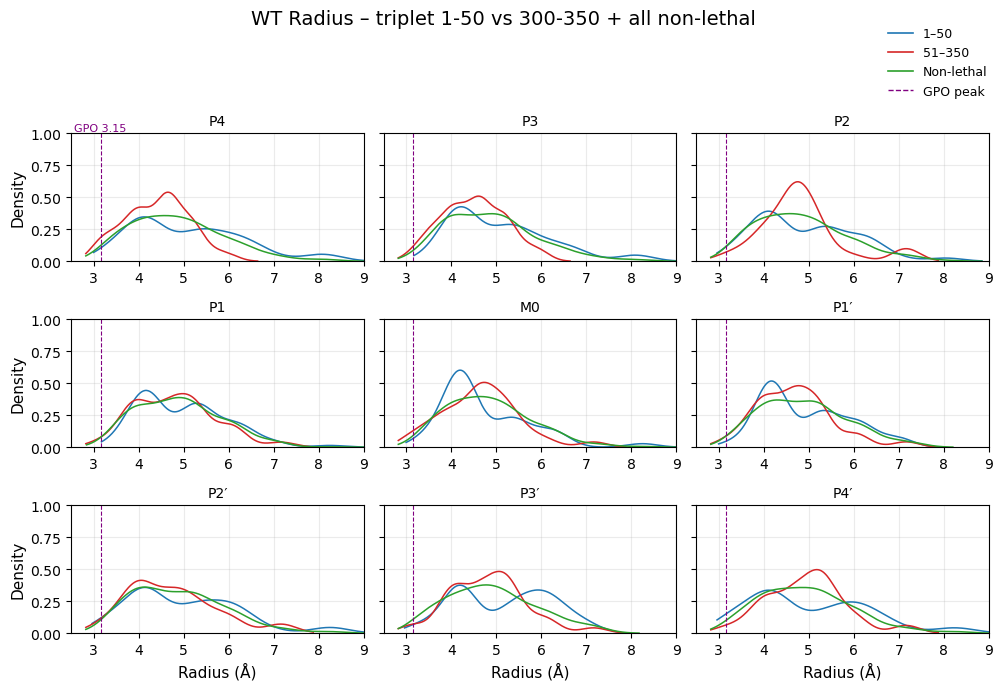

In [116]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# ---------------- 基本設定 ----------------
POS_LABS = ["P4","P3","P2","P1","M0","P1′","P2′","P3′","P4′"]
COLORS_GRP = {
    "1–50"      : "#1f77b4",   # 藍
    "51–350"    : "#d62728",   # 紅
    "Non-lethal": "#2ca02c",   # 綠  ### NEW
}
CLR_GPO = "purple"

# ===== 指標選擇 =====
wt_data  = radius_wt_avg        # ← 換成 unit_wt_avg 可畫 unit-height
gpo_traj = gpo_radius_traj      # ← 換成 gpo_unit_hei_traj

# -------- GPO 峰值 --------
gpo_vals = gpo_traj[:, 1:].ravel()
xs_gpo   = np.linspace(gpo_vals.min()*0.9, gpo_vals.max()*1.1, 300)
ys_gpo   = gaussian_kde(gpo_vals, bw_method=0.7)(xs_gpo)
peak_gpo = xs_gpo[np.argmax(ys_gpo)]

# -------- 建立 3 個 WT 子集合 --------
mut_name = mutation_name_arr.astype(str)
tripnum  = triplet_number_arr
lethal   = lethal_arr

# mask_1_50      = (mut_name=="CYS") & (tripnum>=  1) & (tripnum<= 50)
# mask_51_350    = (mut_name=="CYS") & (tripnum>= 300) & (tripnum<=350)
# mask_nonlethal = (mut_name=="CYS") & (lethal==1)             ### NEW

mask_1_50      =(tripnum>=  1) & (tripnum<= 50)
mask_51_350    =(tripnum>= 300) & (tripnum<=350)
mask_nonlethal =(lethal==1)             ### NEW

grp = {
    "1–50"      : wt_data[mask_1_50],
    "51–350"    : wt_data[mask_51_350],
    "Non-lethal": wt_data[mask_nonlethal],                   ### NEW
}

# --------------- 畫圖 --------------------
fig, axes = plt.subplots(3, 3, figsize=(10, 7), sharey=True)
axes = axes.ravel()

for i, (pos_lab, ax) in enumerate(zip(POS_LABS, axes)):
    for tag, arr in grp.items():
        if arr.size == 0:
            continue
        vals = arr[:, i]
        kde  = gaussian_kde(vals, bw_method=0.35)
        xs   = np.linspace(vals.min()*0.9, vals.max()*1.1, 300)
        ax.plot(xs, kde(xs), color=COLORS_GRP[tag], lw=1.1,
                label=tag if i == 0 else None)

    # GPO 參考峰值
    ax.axvline(peak_gpo, color=CLR_GPO, ls='--', lw=.8)
    if i == 0:  # 只標一次
        ax.text(peak_gpo, 1, f"GPO {peak_gpo:.2f}",
                color=CLR_GPO, ha="center", va="bottom",
                fontsize=8)

    ax.set_title(pos_lab, fontsize=10)
    ax.set_xlim(2.5, 9)          # 畫 unit-height 時改合適區間
    ax.set_ylim(0, 1)
    ax.grid(alpha=.25)

# y / x 標籤
for ax in axes[::3]:
    ax.set_ylabel("Density", fontsize=11)
for ax in axes[-3:]:
    ax.set_xlabel("Radius (Å)", fontsize=11)

# 圖例
handles = [plt.Line2D([], [], color=c, lw=1.2, label=tag)
           for tag, c in COLORS_GRP.items()]
handles.append(plt.Line2D([], [], color=CLR_GPO, ls='--', lw=1,
                          label="GPO peak"))
fig.legend(handles=handles, loc=(0.88, 0.85), frameon=False, fontsize=9)

fig.suptitle("WT Radius – triplet 1-50 vs 300-350 + all non-lethal",
             fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.9])
plt.show()


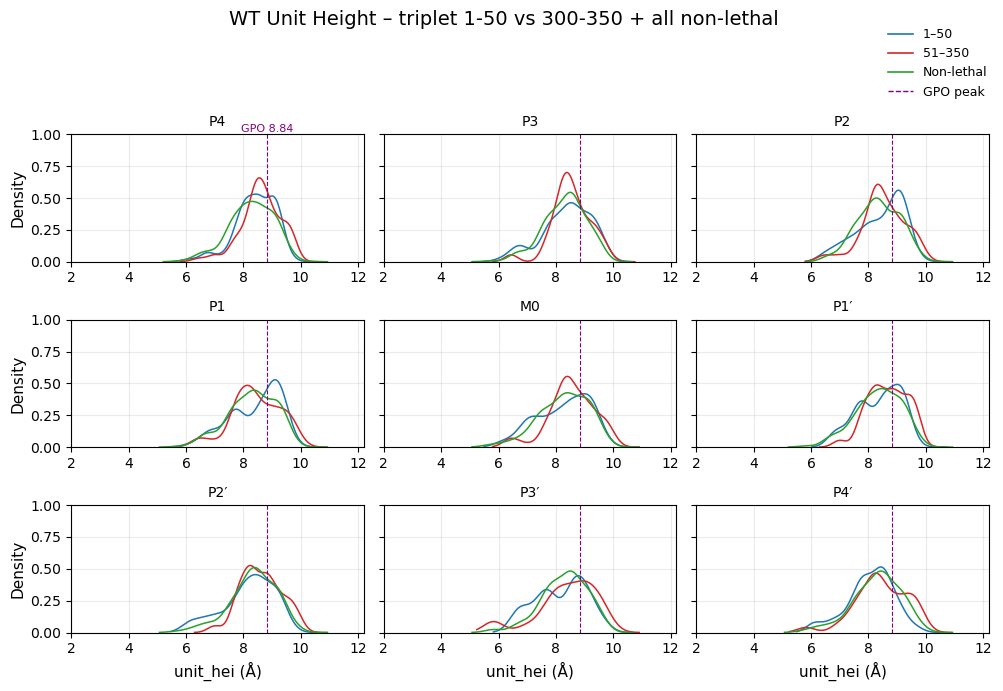

In [115]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# ---------------- 基本設定 ----------------
POS_LABS = ["P4","P3","P2","P1","M0","P1′","P2′","P3′","P4′"]
COLORS_GRP = {
    "1–50"      : "#1f77b4",   # 藍
    "51–350"    : "#d62728",   # 紅
    "Non-lethal": "#2ca02c",   # 綠  ### NEW
}
CLR_GPO = "purple"

# ===== 指標選擇 =====
wt_data  = unit_wt_avg        # ← 換成 unit_wt_avg 可畫 unit-height
gpo_traj = gpo_unit_hei_traj      # ← 換成 gpo_unit_hei_traj

# -------- GPO 峰值 --------
gpo_vals = gpo_traj[:, 1:].ravel()
xs_gpo   = np.linspace(gpo_vals.min()*0.9, gpo_vals.max()*1.1, 300)
ys_gpo   = gaussian_kde(gpo_vals, bw_method=0.7)(xs_gpo)
peak_gpo = xs_gpo[np.argmax(ys_gpo)]

# -------- 建立 3 個 WT 子集合 --------
mut_name = mutation_name_arr.astype(str)
tripnum  = triplet_number_arr
lethal   = lethal_arr

# mask_1_50      = (mut_name=="CYS") & (tripnum>=  1) & (tripnum<= 50)
# mask_51_350    = (mut_name=="CYS") & (tripnum>= 300) & (tripnum<=350)
# mask_nonlethal = (mut_name=="CYS") & (lethal==1)             ### NEW

mask_1_50      = (tripnum>=  1) & (tripnum<= 50)
mask_51_350    = (tripnum>= 300) & (tripnum<=350)
mask_nonlethal = (lethal==1)             ### NEW


grp = {
    "1–50"      : wt_data[mask_1_50],
    "51–350"    : wt_data[mask_51_350],
    "Non-lethal": wt_data[mask_nonlethal],                   ### NEW
}

# --------------- 畫圖 --------------------
fig, axes = plt.subplots(3, 3, figsize=(10, 7), sharey=True)
axes = axes.ravel()

for i, (pos_lab, ax) in enumerate(zip(POS_LABS, axes)):
    for tag, arr in grp.items():
        if arr.size == 0:
            continue
        vals = arr[:, i]
        kde  = gaussian_kde(vals, bw_method=0.35)
        xs   = np.linspace(vals.min()*0.9, vals.max()*1.1, 300)
        ax.plot(xs, kde(xs), color=COLORS_GRP[tag], lw=1.1,
                label=tag if i == 0 else None)

    # GPO 參考峰值
    ax.axvline(peak_gpo, color=CLR_GPO, ls='--', lw=.8)
    if i == 0:  # 只標一次
        ax.text(peak_gpo, 1, f"GPO {peak_gpo:.2f}",
                color=CLR_GPO, ha="center", va="bottom",
                fontsize=8)

    ax.set_title(pos_lab, fontsize=10)
    ax.set_xlim(2, 12.2)          # 畫 unit-height 時改合適區間
    ax.set_ylim(0, 1)
    ax.grid(alpha=.25)

# y / x 標籤
for ax in axes[::3]:
    ax.set_ylabel("Density", fontsize=11)
for ax in axes[-3:]:
    ax.set_xlabel("unit_hei (Å)", fontsize=11)

# 圖例
handles = [plt.Line2D([], [], color=c, lw=1.2, label=tag)
           for tag, c in COLORS_GRP.items()]
handles.append(plt.Line2D([], [], color=CLR_GPO, ls='--', lw=1,
                          label="GPO peak"))
fig.legend(handles=handles, loc=(0.88, 0.85), frameon=False, fontsize=9)

fig.suptitle("WT Unit Height – triplet 1-50 vs 300-350 + all non-lethal",
             fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.9])
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
import os

# -------- 基本參數 -------------------------------------------------
POS_LABS  = ["P4","P3","P2","P1","M0","P1′","P2′","P3′","P4′"]
COLORS    = ["#ff1493","#227700","#ffd700","#00ffff",
             "#000000","#4575b4","#542788","#cc0000","#00ff00"]

# GPO 參考曲線（你之前用過的）
combined_vals = gpo_radius_traj[:, 1:].ravel()
xs_gpo = np.linspace(combined_vals.min()*0.9,
                     combined_vals.max()*1.1, 300)
ys_gpo = gaussian_kde(combined_vals, bw_method=0.7)(xs_gpo)
peak_gpo = xs_gpo[np.argmax(ys_gpo)]

# -------- 單張圖：九條 KDE 疊在一起 -------------------------------
def plot_kde_9pos(data_avg, meta, *, chain=1,
                  title_prefix="Radius",
                  save_path="out.png"):
    """
    data_avg : (587, 9)  ← radius_avg 或 radius_wt_avg
    chain    : 1 / 2     ← α1 / α2
    save_path: 完整檔名  ← 直接存檔；函式內不呼叫 plt.show()
    """
    alpha12 = np.asarray(meta["alpha12_arr"])
    mutname = np.asarray(meta["mutation_name"], dtype=str)

    msk = (alpha12 == chain) & (mutname == "CYS")   # 只挑 Cys @ 指定鏈
    sel = data_avg[msk]                             # (n,9)
    if sel.size == 0:
        print(f"α{chain} – no Cys sample, skip.")
        return

    plt.figure(figsize=(8, 4))
    for i, lab in enumerate(POS_LABS):
        vals = sel[:, i]
        kde  = gaussian_kde(vals, bw_method=0.45)
        xs   = np.linspace(vals.min()*0.9, vals.max()*1.1, 300)
        plt.plot(xs, kde(xs), color=COLORS[i], lw=1, label=lab)

    # 疊 GPO
    plt.plot(xs_gpo, ys_gpo, color='purple', lw=.6, label='GPO')
    plt.axvline(peak_gpo, color='purple', ls='--', lw=.8)
    plt.text(peak_gpo, plt.ylim()[1]*0.9, f"{peak_gpo:.2f} Å",
             ha='center', va='bottom', fontsize=9,
             color='purple', backgroundcolor='white')

    plt.xlabel(f"{title_prefix} (Å)", fontsize=12)
    plt.ylabel("Density",            fontsize=12)
    plt.title(f"{title_prefix} – α{chain}  (Cys, all triplets)", fontsize=14)
    plt.legend(frameon=False, ncol=10, fontsize=8, loc='upper center')
    plt.grid(alpha=.25)
    plt.tight_layout()

    # 直接存檔並關閉
    os.makedirs(os.path.dirname(save_path), exist_ok=True)
    plt.savefig(save_path, dpi=300, bbox_inches="tight")
    plt.close()
    print("Saved →", save_path)

# -------- 批次產四張 ------------------------------------------------
meta = {
    "mutation_name": mutation_name_arr,
    "lethal_arr":    lethal_arr,
    "alpha12_arr":   alpha12_arr,
}

out_dir = "D:/collagen/figures/a1_a2_WT_MUT"
os.makedirs(out_dir, exist_ok=True)

# (資料陣列, 檔名用字串, title 前綴)
jobs = [
    (radius_wt_avg,  "Radius_a1_WT.png",  "Radius"),
    (radius_avg,     "Radius_a1_Mut.png", "Radius"),
    (radius_wt_avg,  "Radius_a2_WT.png",  "Radius"),
    (radius_avg,     "Radius_a2_Mut.png", "Radius"),
]

for data, fname, ttl in jobs:
    chain = 1 if "a1" in fname else 2
    plot_kde_9pos(data, meta,
                  chain=chain,
                  title_prefix=ttl,
                  save_path=os.path.join(out_dir, fname))


Saved → D:/collagen/figures/a1_a2_WT_MUT\Radius_a1_WT.png
Saved → D:/collagen/figures/a1_a2_WT_MUT\Radius_a1_Mut.png
Saved → D:/collagen/figures/a1_a2_WT_MUT\Radius_a2_WT.png
Saved → D:/collagen/figures/a1_a2_WT_MUT\Radius_a2_Mut.png
